# Abstract:

This dataset contains flight details for various domestic flights in India, including information on the airline, journey date, source and destination cities, flight route, departure and arrival times, flight duration, number of stops, additional flight information, and ticket price. The data offers insights into flight schedules, stopovers, and price variations across different airlines, providing a valuable resource for analyzing travel trends, pricing patterns, and route planning within the Indian aviation industry.



# Problem Statement:

The objective of this analysis is to **predict the ticket price of domestic flights** in India based on various features such as the airline, date of journey, source and destination cities, flight route, departure and arrival times, flight duration, and the number of stops. By building a predictive model using machine learning algorithms, we aim to provide insights into the factors that influence flight pricing, optimize cost forecasting for travelers, and support airline companies in their pricing strategies. Additionally, the analysis will explore patterns in flight schedules, durations, and stopovers to offer recommendations for improving customer experience and operational efficiency.



# Dataset Description

# Flight Data Description

### Airline
- The name of the airline operating the flight.  
- **Example**: IndiGo, Air India, Jet Airways.  

### Date_of_Journey
- The scheduled date of travel in the format **DD/MM/YYYY**.  
- **Example**: 24/03/2023.  

### Source
- The starting city or airport from where the flight departs.  
- **Example**: Delhi, Mumbai, Kolkata.  

### Destination
- The ending city or airport where the flight arrives.  
- **Example**: Bangalore, Chennai, Hyderabad.  

### Route
- The sequence of stops (layovers) from the source to the destination.  
- **Example**: DEL → BOM → BLR.  

### Dep_Time
- The departure time of the flight from the source airport in the format **HH:MM** (24-hour clock).  
- **Example**: 22:15.  

### Arrival_Time
- The arrival time of the flight at the destination in the format **HH:MM** (24-hour clock).  
- May include the date if the flight arrives the next day.  
- **Example**: 01:30, 25/03/2023.  

### Duration
- The total travel time of the flight, including layovers, represented in **hours** and **minutes**.  
- **Example**: 2h 50m, 5h 30m.  

### Total_Stops
- The number of layovers during the flight.  
- **Categories**:  
  - **Non-stop**: No layovers.  
  - **1 stop**: One layover.  
  - **2 stops**: Two layovers, etc.  

### Additional_Info
- Extra information about the flight.  
- **Example**: No info, Business class, In-flight meal not included.  

### Price
- The ticket price of the flight in **Indian Rupees (INR)**.  
- **Example**: ₹5000, ₹12000.  
t in INR.


# Libraries

In [132]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'math'
import math

# import subpackage of 'Matplotlib'
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
from scipy import stats
from plotly.subplots import make_subplots

# Load Dataset

In [133]:
# Loading the training data
data= pd.read_excel("Airline.xlsx")

In [134]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data PreProcessing

**Check the Dataset and Null Values**

In [135]:
# Exploratory Data Analysis (EDA) on the complete dataset

print("\n EDA on Complete Dataset\n")
print("*" * 90)

# Display the dataset features/columns
print("\nFeatures/Columns:\n {}".format(data.columns))
print("*" * 90)

# Display the number of rows
print("\n\nNumber of Columns: {}".format(data.shape[1]))
print("*" * 90)

# Display the data types of each feature
print("\n\nData Types: \n {}".format(data.dtypes))
print("*" * 90)

# Check for NaN values in the dataset
print("\nContains NaN values in the cells: {}\n".format(data.isna().values.any()))
print("*" * 90)

# Display the total number of empty cells by columns
print("\nTotal Empty Cells by Columns:\n{}".format(data.isna().sum()), "\n\n")
print("*" * 90)


 EDA on Complete Dataset

******************************************************************************************

Features/Columns:
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
******************************************************************************************


Number of Columns: 11
******************************************************************************************


Data Types: 
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
******************************************************************************************

Contains NaN values in the cells: True

*****************

In [136]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [137]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

**Handling Missing Value**

In [138]:
#To count how many missing values are there in the dataset in row as well as column
data.isnull().sum().sum()

np.int64(2)

In [139]:
# Calculate the percentage of null values in the dataset
null_percentage = round((data.isnull().sum().sum() * 100) / (data.size), 2)
print(f"The dataset contains {null_percentage}% null values.")

The dataset contains 0.0% null values.


In [140]:
# Remove duplicate rows
data.drop_duplicates(keep='first', inplace=True)

In [141]:
# Calculate missing values and percentages
missing_values=data.isna().sum()
missing_percentage=round(100*missing_values /data.shape[0],2)
# Create a DataFrame with sorted values
missing_summary = (
    pd.DataFrame({
        'Column': data.columns,
        'No. Missing Values': missing_values,
        'Percent': missing_percentage
    })
    .sort_values(by='Percent', ascending=False)
    .reset_index(drop=True)
)
# Display the summary
missing_summary.style.set_properties(**{'text-align': 'left'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }]) \
    .bar(subset=['Percent'], color='grey', vmin=0, vmax=100)

,Column,No. Missing Values,Percent
0,Route,1,0.010000
1,Total_Stops,1,0.010000
2,Airline,0,0.000000
3,Source,0,0.000000
4,Date_of_Journey,0,0.000000
5,Dep_Time,0,0.000000
6,Destination,0,0.000000
7,Arrival_Time,0,0.000000
8,Duration,0,0.000000
9,Additional_Info,0,0.000000


In [142]:
# Fill missing values in 'Total_Stops' with the mode (most common value)
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0], inplace=True)
data['Route'].fillna(data['Route'].mode()[0],inplace=True)

In [143]:
# Calculate missing values and percentages
missing_values=data.isna().sum()
missing_percentage=round(100*missing_values /data.shape[0],2)
# Create a DataFrame with sorted values
missing_summary = (
    pd.DataFrame({
        'Column': data.columns,
        'No. Missing Values': missing_values,
        'Percent': missing_percentage
    })
    .sort_values(by='Percent', ascending=False)
    .reset_index(drop=True)
)
# Display the summary
missing_summary.style.set_properties(**{'text-align': 'left'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }]) \
    .bar(subset=['Percent'], color='grey', vmin=0, vmax=100)

,Column,No. Missing Values,Percent
0,Airline,0,0.000000
1,Date_of_Journey,0,0.000000
2,Source,0,0.000000
3,Destination,0,0.000000
4,Route,0,0.000000
5,Dep_Time,0,0.000000
6,Arrival_Time,0,0.000000
7,Duration,0,0.000000
8,Total_Stops,0,0.000000
9,Additional_Info,0,0.000000


In [144]:
for i in data.columns:
    print('Number of unique Values in',i,'are -',data[i].nunique(),'\n')
    print('Counts of each value in',i,'-\n',data[i].value_counts(),'\n\n\n')

Number of unique Values in Airline are - 12 

Counts of each value in Airline -
 Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64 



Number of unique Values in Date_of_Journey are - 44 

Counts of each value in Date_of_Journey -
 Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019  

# Data Preporcessing

### Purpose  
To determine the season ('winter', 'spring', 'summer', or 'fall') based on the given month of the year.


In [145]:
# Function to extract the season from a month
def getSeason(month):
    """
    Returns the season based on the given month.
    Args:
        month (int): Month as an integer (1 to 12).
    Returns:
        str: Season ('winter', 'spring', 'summer', or 'fall').
    """
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]: 
        return "fall"
    else:
        return "Unknown" 

**Date_of_Journey**

In [146]:
import pandas as pd

def extract_journey_day_month(data):
    """
    Extracts the day and month from the 'Date_of_Journey' column and adds them as new columns
    'Journey_day' and 'Journey_month' to the DataFrame.
    """
    data["Journey_day"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day
    data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.month
    return data
data = extract_journey_day_month(data)

In [147]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [148]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [149]:
data['Journey_month'].unique()

array([3, 5, 6, 4], dtype=int32)

In [150]:
# Apply the function to the Journey_month column
data['Journey_Season'] =data['Journey_month'].apply(getSeason)

In [151]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,spring
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,spring
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,summer
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,spring
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,spring


In [152]:
# Function to extract the period of the day
def getPeriodOfDay(hour):
    """
    Returns the period of the day based on the hour.
    Args:
        hour (int): Hour of the day (0 to 23).
    Returns:
        str: Period of the day ('Early Morning', 'Morning', 'Noon', 'Eve', 'Night', or 'Late Night').
    """
    try:
        # Determine the period of the day
        if 4 < hour <= 8:
            return 'Early Morning'
        elif 8 < hour <= 12:
            return 'Morning'
        elif 12 < hour <= 16:
            return 'Noon'
        elif 16 < hour <= 20:
            return 'Eve'
        elif 20 < hour <= 23:
            return 'Night'
        elif 0 <= hour <= 4:
            return 'Late Night'
        else:
            return 'Unknown'  # Handle unexpected hour values
    except (ValueError, TypeError):
        return "Invalid Time"  # Handle invalid input

**Dep_Time**

In [153]:
def process_departure_time(data, column_name="Dep_Time"):
    """
    Extracts hour and minute from the departure time and drops the original column.
    """
    data["Dep_hour"] = pd.to_datetime(data[column_name]).dt.hour
    data["Dep_min"] = pd.to_datetime(data[column_name]).dt.minute
    #data.drop(["Dep_Time"], axis=1, inplace=True)
    return data
data = process_departure_time(data, column_name="Dep_Time")

In [154]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,spring,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,spring,5,50


In [155]:
data['Dep_hour'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3], dtype=int32)

In [156]:
# Apply the function to the 'Dep_hour' column
data['Dep_period'] = data['Dep_hour'].apply(getPeriodOfDay)

In [157]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,spring,22,20,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,spring,5,50,Early Morning


**Arrival_Time**

In [158]:
def process_arrival_time(data, column_name="Arrival_Time"):
    """
    Extracts hour and minute from the arrival time and drops the original column.
    """
    data["Arrival_hour"] = pd.to_datetime(data[column_name]).dt.hour
    data["Arrival_min"] = pd.to_datetime(data[column_name]).dt.minute
    data.drop(["Arrival_Time"], axis=1, inplace=True)
    return data
data = process_arrival_time(data, column_name="Arrival_Time")

In [159]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,spring,22,20,Night,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,spring,5,50,Early Morning,13,15


In [160]:
# Apply the function to the 'Arrival_hour' column
data['Arrival_period'] = data['Arrival_hour'].apply(getPeriodOfDay)

In [161]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min,Arrival_period
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,spring,22,20,Night,1,10,Late Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,spring,5,50,Early Morning,13,15,Noon


**Duration**

In [162]:
def process_duration(data, column_name="Duration"):
    """
    Processes the duration column to extract hours and minutes and handle missing components.
    """
    # Convert Duration column to a list
    duration = list(data[column_name])
    
   
    for i in range(len(duration)):
        if len(duration[i].split()) != 2:  
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"  
            else:
                duration[i] = "0h " + duration[i]         
    
    # Extract hours and minutes
    duration_hours = [int(d.split(sep="h")[0]) for d in duration] 
    duration_mins = [int(d.split(sep="m")[0].split()[-1]) for d in duration] 
    
    
    data["Duration_hours"] = duration_hours
    data["Duration_mins"] = duration_mins
    
    return data
data = process_duration(data, column_name="Duration")

In [163]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min,Arrival_period,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,spring,22,20,Night,1,10,Late Night,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,spring,5,50,Early Morning,13,15,Noon,7,25


In [164]:
data.drop(["Duration"], axis = 1, inplace = True)

In [165]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min,Arrival_period,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,spring,22,20,Night,1,10,Late Night,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,spring,5,50,Early Morning,13,15,Noon,7,25


In [166]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [167]:
# Rename 'New Delhi' to 'Delhi' in the 'Destination' column
data['Destination'] = data['Destination'].replace('New Delhi', 'Delhi')

In [168]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [169]:
# # Create a source-destination column for analysis
data['Source-Destination'] = data['Source'] + ' → ' + data['Destination']

In [170]:
# Convert Duration_hours to minutes and add Duration_mins
data['Total_Duration_minutes'] = (data['Duration_hours'] * 60) + data['Duration_mins']

In [171]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min,Arrival_period,Duration_hours,Duration_mins,Source-Destination,Total_Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,spring,22,20,Night,1,10,Late Night,2,50,Banglore → Delhi,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,spring,5,50,Early Morning,13,15,Noon,7,25,Kolkata → Banglore,445


In [172]:
# Display the data types of all columns
print("Data Types of Columns:\n")
print(data.dtypes)

Data Types of Columns:

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time                  object
Total_Stops               object
Additional_Info           object
Price                      int64
Journey_day                int32
Journey_month              int32
Journey_Season            object
Dep_hour                   int32
Dep_min                    int32
Dep_period                object
Arrival_hour               int32
Arrival_min                int32
Arrival_period            object
Duration_hours             int64
Duration_mins              int64
Source-Destination        object
Total_Duration_minutes     int64
dtype: object


#  Exploratory Data Analysis.

In [173]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min,Arrival_period,Duration_hours,Duration_mins,Source-Destination,Total_Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,spring,22,20,Night,1,10,Late Night,2,50,Banglore → Delhi,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,spring,5,50,Early Morning,13,15,Noon,7,25,Kolkata → Banglore,445


# Airline

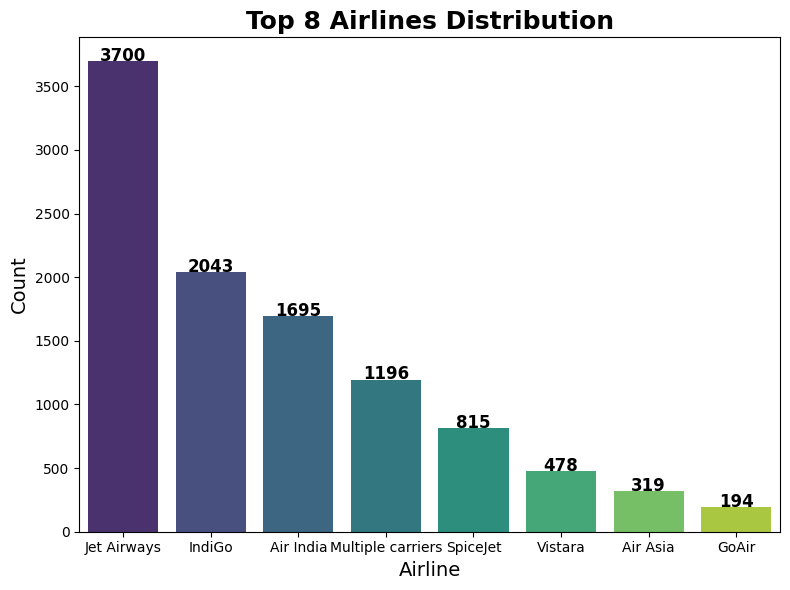

In [174]:
# Select the top 8 airlines based on their count
top_8_airlines = data['Airline'].value_counts().head(8).index
filtered_data = data[data['Airline'].isin(top_8_airlines)]
plt.figure(figsize=(8, 6))
# Create the countplot for the filtered 'Airline' column
ax = sns.countplot(x='Airline', data=filtered_data, palette='viridis', order=top_8_airlines)
# Annotate counts on the bars
for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count)
    x_pos = bar.get_x() + bar.get_width() / 2  # Center the text on the bar
    y_pos = bar.get_height()  # Position the text above the bar
    ax.text(x_pos, y_pos + 0.5, f'{count}', ha='center', fontsize=12, fontweight='bold')
# Customize the title and labels
plt.title('Top 8 Airlines Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()

### Insights:
- The data reveals that **Jet Airways**, **IndiGo**, and **Air India** have significantly higher demand compared to other airlines. These airlines dominate the dataset, suggesting their popularity or a larger market share.
- Other airlines, such as SpiceJet, GoAir, and Vistara, have comparatively lower frequencies, indicating less demand or potentially fewer available routes.

#### Implications:
- **High-Demand Airlines**: The dominance of Jet Airways, IndiGo, and Air India can provide robust insights into customer preferences and pricing strategies.
- **Low-Demand Airlines**: Airlines with fewer data points may either represent niche markets or less popular routes. Their analysis might be less reliable due to limited representation.

# Price

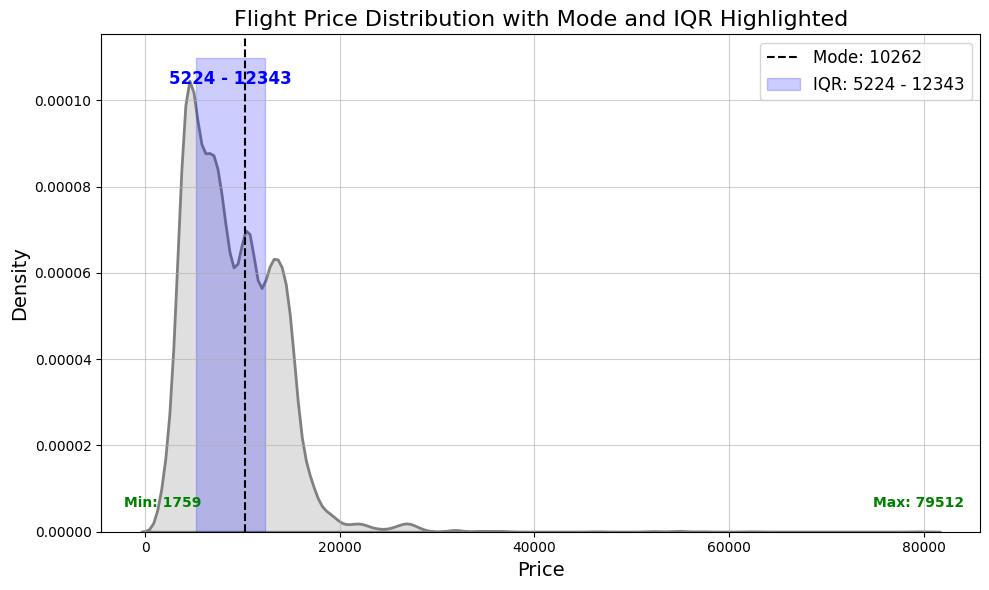

In [175]:
# Assuming 'cleaned_prices' is already defined
cleaned_prices = data['Price']

# Calculate statistical measures
min_price = cleaned_prices.min()
max_price = cleaned_prices.max()
mode_price = stats.mode(cleaned_prices, keepdims=True).mode[0]  # Access the mode correctly
lower_percentile = np.percentile(cleaned_prices, 25)
upper_percentile = np.percentile(cleaned_prices, 75)

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned_prices, fill=True, color='grey', linewidth=2)

# Highlight the mode with a vertical line
plt.axvline(x=mode_price, color='black', linestyle='--', label=f'Mode: {int(mode_price)}')

# Add shaded region for the interquartile range (IQR)
plt.fill_betweenx(
    y=[0, plt.ylim()[1]], 
    x1=lower_percentile, x2=upper_percentile, 
    color='blue', alpha=0.2, label=f'IQR: {int(lower_percentile)} - {int(upper_percentile)}'
)

# Annotate minimum and maximum prices
plt.text(min_price, plt.ylim()[1] * 0.05, f"Min: {int(min_price)}", color="green", fontsize=10, fontweight="bold", ha="center")
plt.text(max_price, plt.ylim()[1] * 0.05, f"Max: {int(max_price)}", color="green", fontsize=10, fontweight="bold", ha="center")

# Annotate the IQR range
plt.text(
    (lower_percentile + upper_percentile) / 2, plt.ylim()[1] * 0.9, 
    f"{int(lower_percentile)} - {int(upper_percentile)}", 
    color="blue", fontsize=12, fontweight="bold", ha="center"
)

# Customize the plot
plt.title('Flight Price Distribution with Mode and IQR Highlighted', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


### Price Distribution Analysis

- **Range**: Flight prices range from ₹1,759 to ₹79,512, with most prices falling between ₹5,224 and ₹12,343.
- **Outliers**: High-priced outliers likely represent premium services or long-haul flights.

#### Implications:
- Majority of flights cater to a common market segment.
- High outliers may indicate business-class or international options.


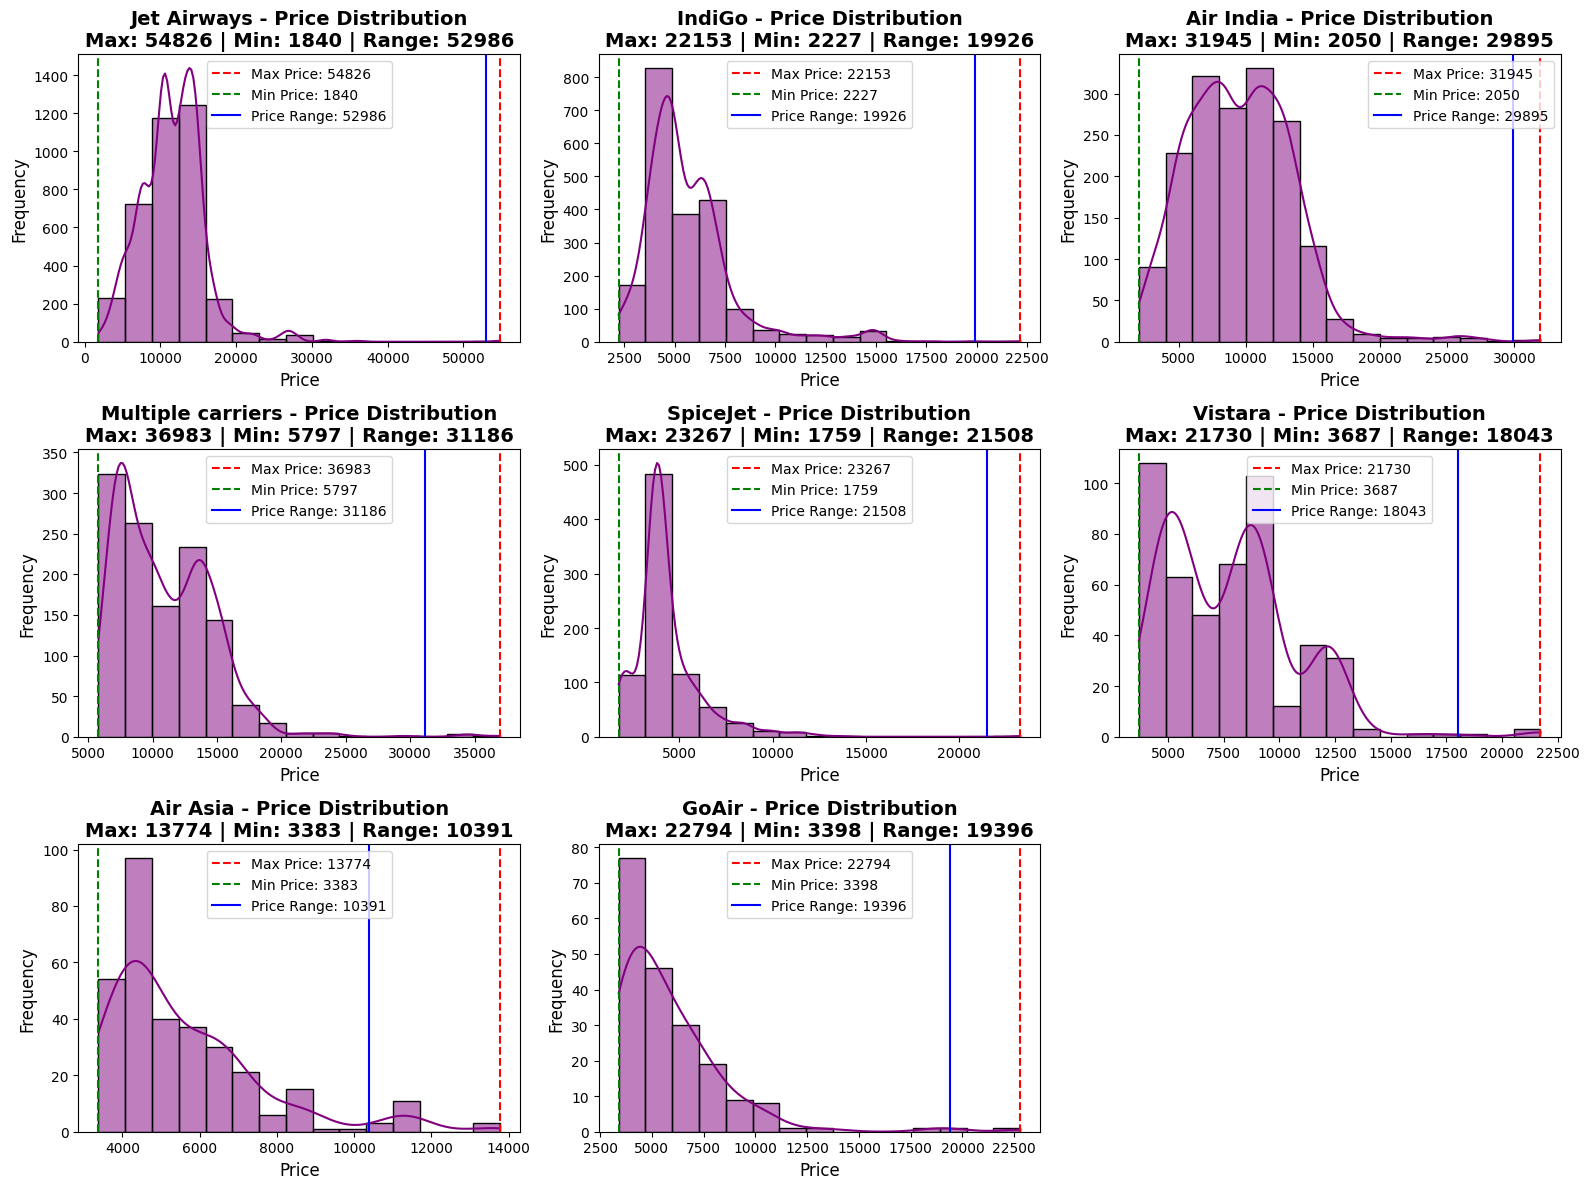

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 8 airlines based on their count
top_8_airlines = data['Airline'].value_counts().head(8).index

# Filter the data for the top 8 airlines
filtered_data = data[data['Airline'].isin(top_8_airlines)]

# Set the figure size for subplots
plt.figure(figsize=(16, 12))

# Create subplots for each airline
for idx, airline in enumerate(top_8_airlines, 1):
    # Filter data for the specific airline
    airline_data = filtered_data[filtered_data['Airline'] == airline]
    
    # Calculate statistics for Price
    max_price = airline_data['Price'].max()
    min_price = airline_data['Price'].min()
    price_range = max_price - min_price

    plt.subplot(3, 3, idx) 
    
    # Create the distribution plot (histogram) for Price for the specific airline
    ax = sns.histplot(airline_data['Price'], kde=True, color='purple', bins=15)
    
    # Add vertical lines for max, min, and price range
    ax.axvline(max_price, color='red', linestyle='--', label=f'Max Price: {max_price}')
    ax.axvline(min_price, color='green', linestyle='--', label=f'Min Price: {min_price}')
    ax.axvline(price_range, color='blue', linestyle='-', label=f'Price Range: {price_range}')
    
    # Add title with max, min, and range information
    ax.set_title(f'{airline} - Price Distribution\nMax: {max_price} | Min: {min_price} | Range: {price_range}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    # Add a legend to identify the lines
    ax.legend()

# Adjust layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

### Airline vs Price Analysis

#### Insights:
- **Jet Airways** has the highest average prices, reflecting premium services and international routes.
- **IndiGo** and **Air India** balance affordability and quality with moderate pricing.
- Budget airlines like **SpiceJet**, **GoAir**, and **Vistara** offer lower prices for cost-conscious travelers.
- **Multiple Airlines** show price variability due to combined ticketing, while **Trujet** focuses on a niche market with low prices.
- Premium airlines have greater price variability, offering a range of classes, while low-cost carriers focus on economy class.

#### Implications:
- Jet Airways and Air India can target high-income travelers with premium pricing.
- Budget airlines should optimize costs to attract price-sensitive customers.
- **Multiple Airlines** offer opportunities for bundled pricing strategies.
- Price trends can guide service optimization and route profitability.
fitability.


# Total_Stops

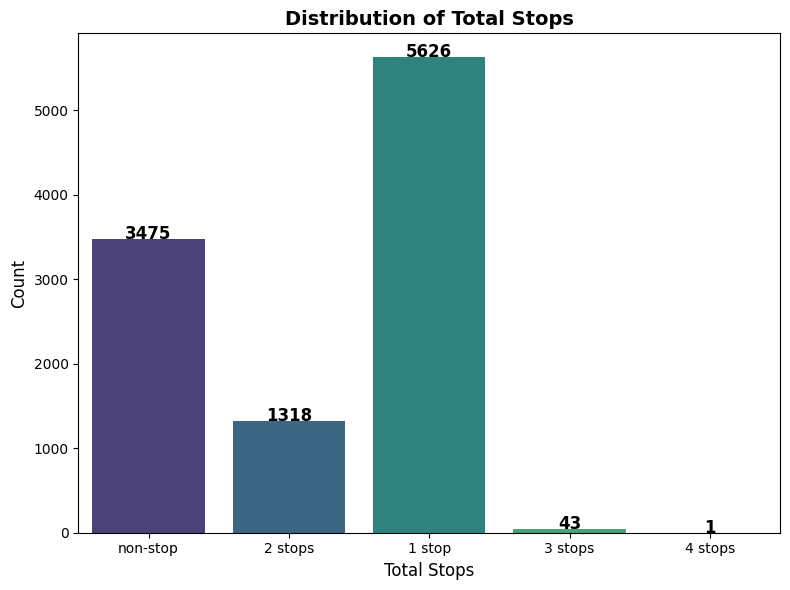

In [177]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the count plot for 'Total_Stops'
ax = sns.countplot(x='Total_Stops', data=data, palette='viridis')
# Annotate counts on the bars
for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count)
    x_pos = bar.get_x() + bar.get_width() / 2  # Center the text on the bar
    y_pos = bar.get_height()  # Position the text above the bar
    ax.text(x_pos, y_pos + 0.5, f'{count}', ha='center', fontsize=12, fontweight='bold')
# Customize the title and labels
plt.title('Distribution of Total Stops', fontsize=14, fontweight='bold')
plt.xlabel('Total Stops', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

**Total Stops Distribution**
"1 stop" flights are the most common, followed by "non-stop" and "2 stops." This suggests passengers and airlines balance convenience and cost, with single-stop flights offering a middle ground.

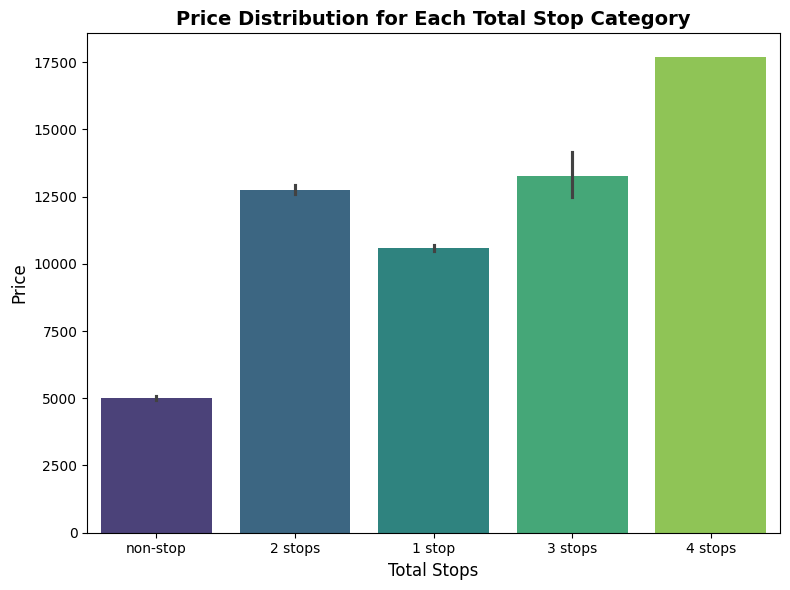

In [178]:
# Set the figure size for the boxplot
plt.figure(figsize=(8, 6))

# Create the boxplot to show how 'Price' varies with 'Total_Stops'
sns.barplot(x='Total_Stops', y='Price', data=data, palette='viridis')

# Customize the title and labels for the boxplot
plt.title('Price Distribution for Each Total Stop Category', fontsize=14, fontweight='bold')
plt.xlabel('Total Stops', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot for price distribution by total stops
plt.tight_layout()
plt.show()

### Inference: Total Stops vs. Price

#### Observation:
- The bar plot indicates that the price of flights tends to increase with the number of stops.
- **Non-stop** flights are generally more expensive, likely due to their convenience.
- **1-stop** flights offer a balance between cost and travel time, making them moderately priced.
- **2 stops** and beyond are typically the least expensive, as they involve longer travel times and less convenience.

#### Insight:
- Airlines may price flights higher for fewer stops to capitalize on passenger preference for shorter travel durations.
- Passengers seeking cost-effective options often choose multi-stop flights despite the added travel time.


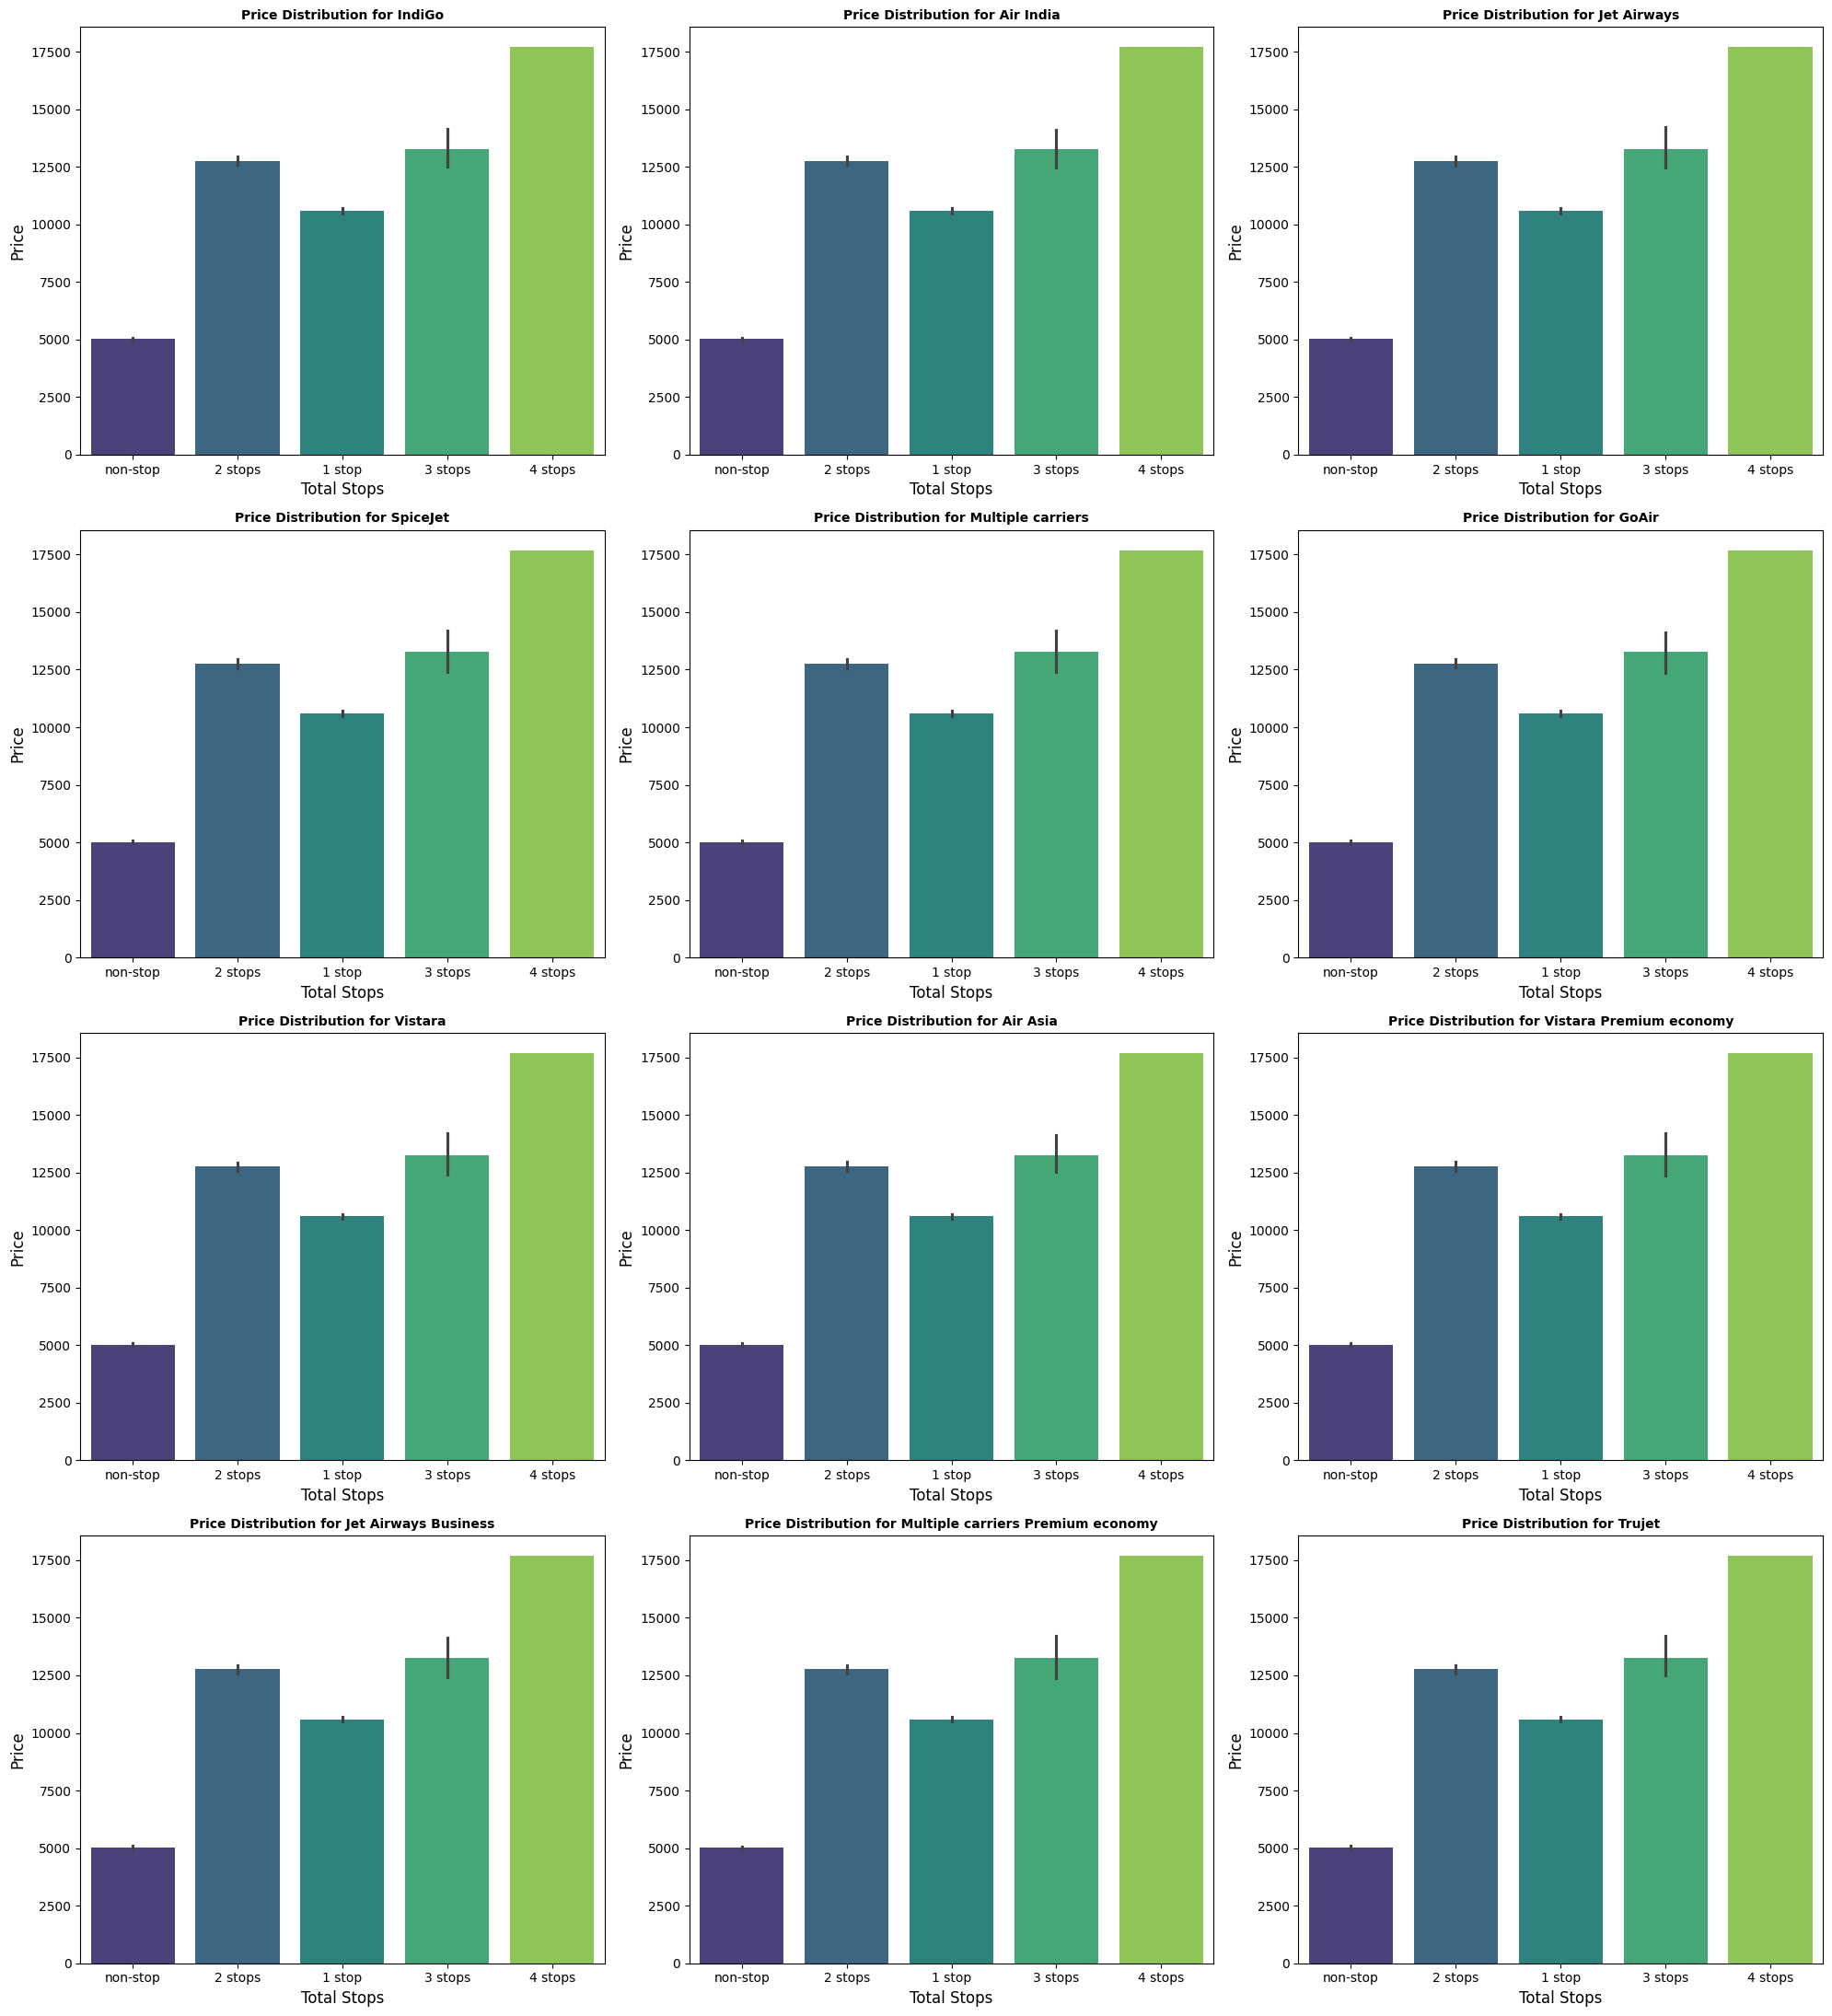

In [179]:
# Get the unique airlines
airlines = data['Airline'].unique()

# Set the figure size for the subplots
plt.figure(figsize=(20, 22))

# Create subplots for each airline
for idx, airline in enumerate(airlines, 1):
    # Filter the data for the current airline
    airline_data = data[data['Airline'] == airline]
    
    # Create a subplot for each airline (rows=4, cols=3 for example, adjust based on number of airlines)
    plt.subplot(4, 3, idx)
    
    # Create the boxplot for 'Total_Stops' and 'Price' for the current airline
    sns.barplot(x='Total_Stops', y='Price', data=data, palette='viridis')
    
    # Customize the title and labels for each subplot
    plt.title(f'Price Distribution for {airline}', fontsize=10, fontweight='bold')
    plt.xlabel('Total Stops', fontsize=12)
    plt.ylabel('Price', fontsize=12)

# Adjust layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

#### Observation:
- For most airlines, the price increases as the number of stops decreases.
- **Non-stop flights** are the most expensive across airlines due to their convenience.
- **1-stop flights** are moderately priced and preferred by budget-conscious passengers seeking shorter travel times.
- **2 stops or more** flights are the least expensive, but they involve longer travel durations and layovers.

#### Insight:
- Airlines consistently price non-stop flights higher to cater to passengers prioritizing convenience.
- Multi-stop flights are priced lower to attract cost-sensitive travelers willing to compromise on travel time.

# Dep_Period

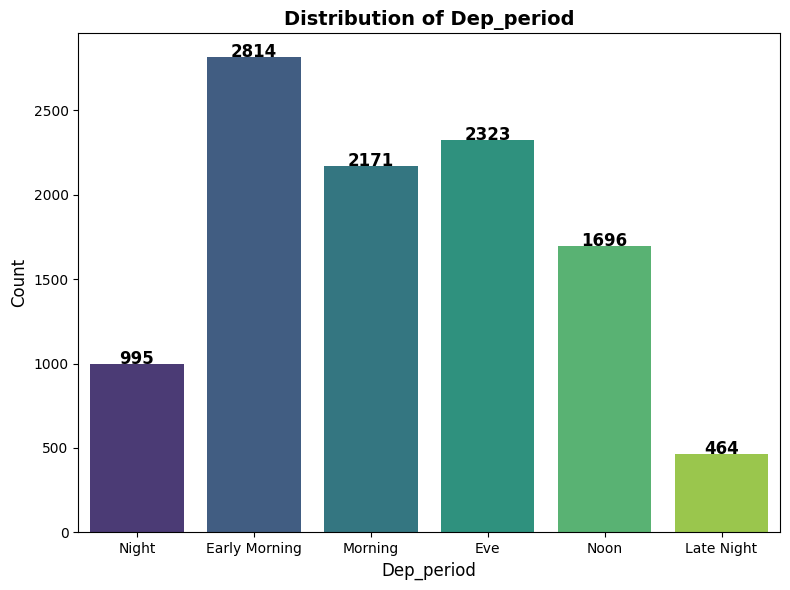

In [180]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the count plot for 'Dep_period'
ax = sns.countplot(x='Dep_period', data=data, palette='viridis')
# Annotate counts on the bars
for bar in ax.patches:
    count = int(bar.get_height())  
    x_pos = bar.get_x() + bar.get_width() / 2  
    y_pos = bar.get_height()  
    ax.text(x_pos, y_pos + 0.5, f'{count}', ha='center', fontsize=12, fontweight='bold')
# Customize the title and labels
plt.title('Distribution of Dep_period', fontsize=14, fontweight='bold')
plt.xlabel('Dep_period', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

### Inference: Departure Period Distribution

#### Observation:
- The distribution of departure periods indicates distinct peaks during specific times of the day:
  - **Morning** departures (6 AM to 12 PM) are the most common, likely catering to business travelers and early leisure trips.
  - **Evening** departures (6 PM to 12 AM) are the second most frequent, accommodating both business and leisure travelers.
  - **Afternoon** departures (12 PM to 6 PM) are moderately frequent, providing flexibility for mid-day travel.
  - **Late-night** departures (12 AM to 6 AM) are the least common, likely due to limited demand during these hours.

#### Insight:
- Airlines schedule more flights during peak travel times (morning and evening) to meet higher demand.
- Late-night departures are less frequent, reflecting reduced passenger preference during these hours.


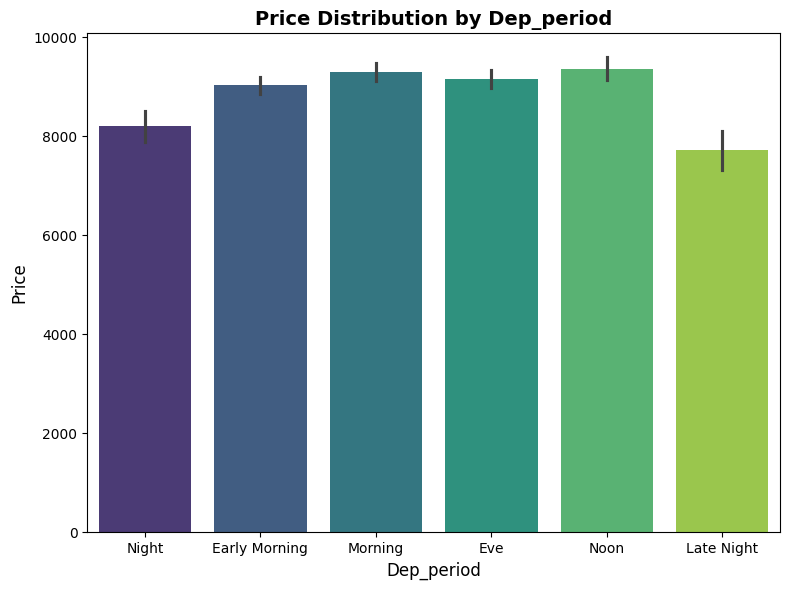

In [181]:
# Set the figure size for the countplot and boxplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Dep_period', y='Price', data=data, palette='viridis')

# Customize the boxplot title and labels
plt.title('Price Distribution by Dep_period', fontsize=14, fontweight='bold')
plt.xlabel('Dep_period', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Inference: Price Ranges by Departure Period

#### Observation:
- **Morning departures (6 AM to 12 PM):** Prices are generally higher, reflecting the demand from business travelers and early leisure trips.
- **Evening departures (6 PM to 12 AM):** Prices are moderately high, catering to both business and leisure travelers.
- **Afternoon departures (12 PM to 6 PM):** Prices tend to be lower, as this period is less popular among travelers.
- **Late-night departures (12 AM to 6 AM):** Prices are the lowest, likely due to reduced demand during these hours.

#### Insight:
- Airlines charge higher prices during high-demand periods (morning and evening) to maximize revenue.
- Lower prices for late-night and afternoon departures attract cost-conscious travelers willing to compromise on preferred travel times.


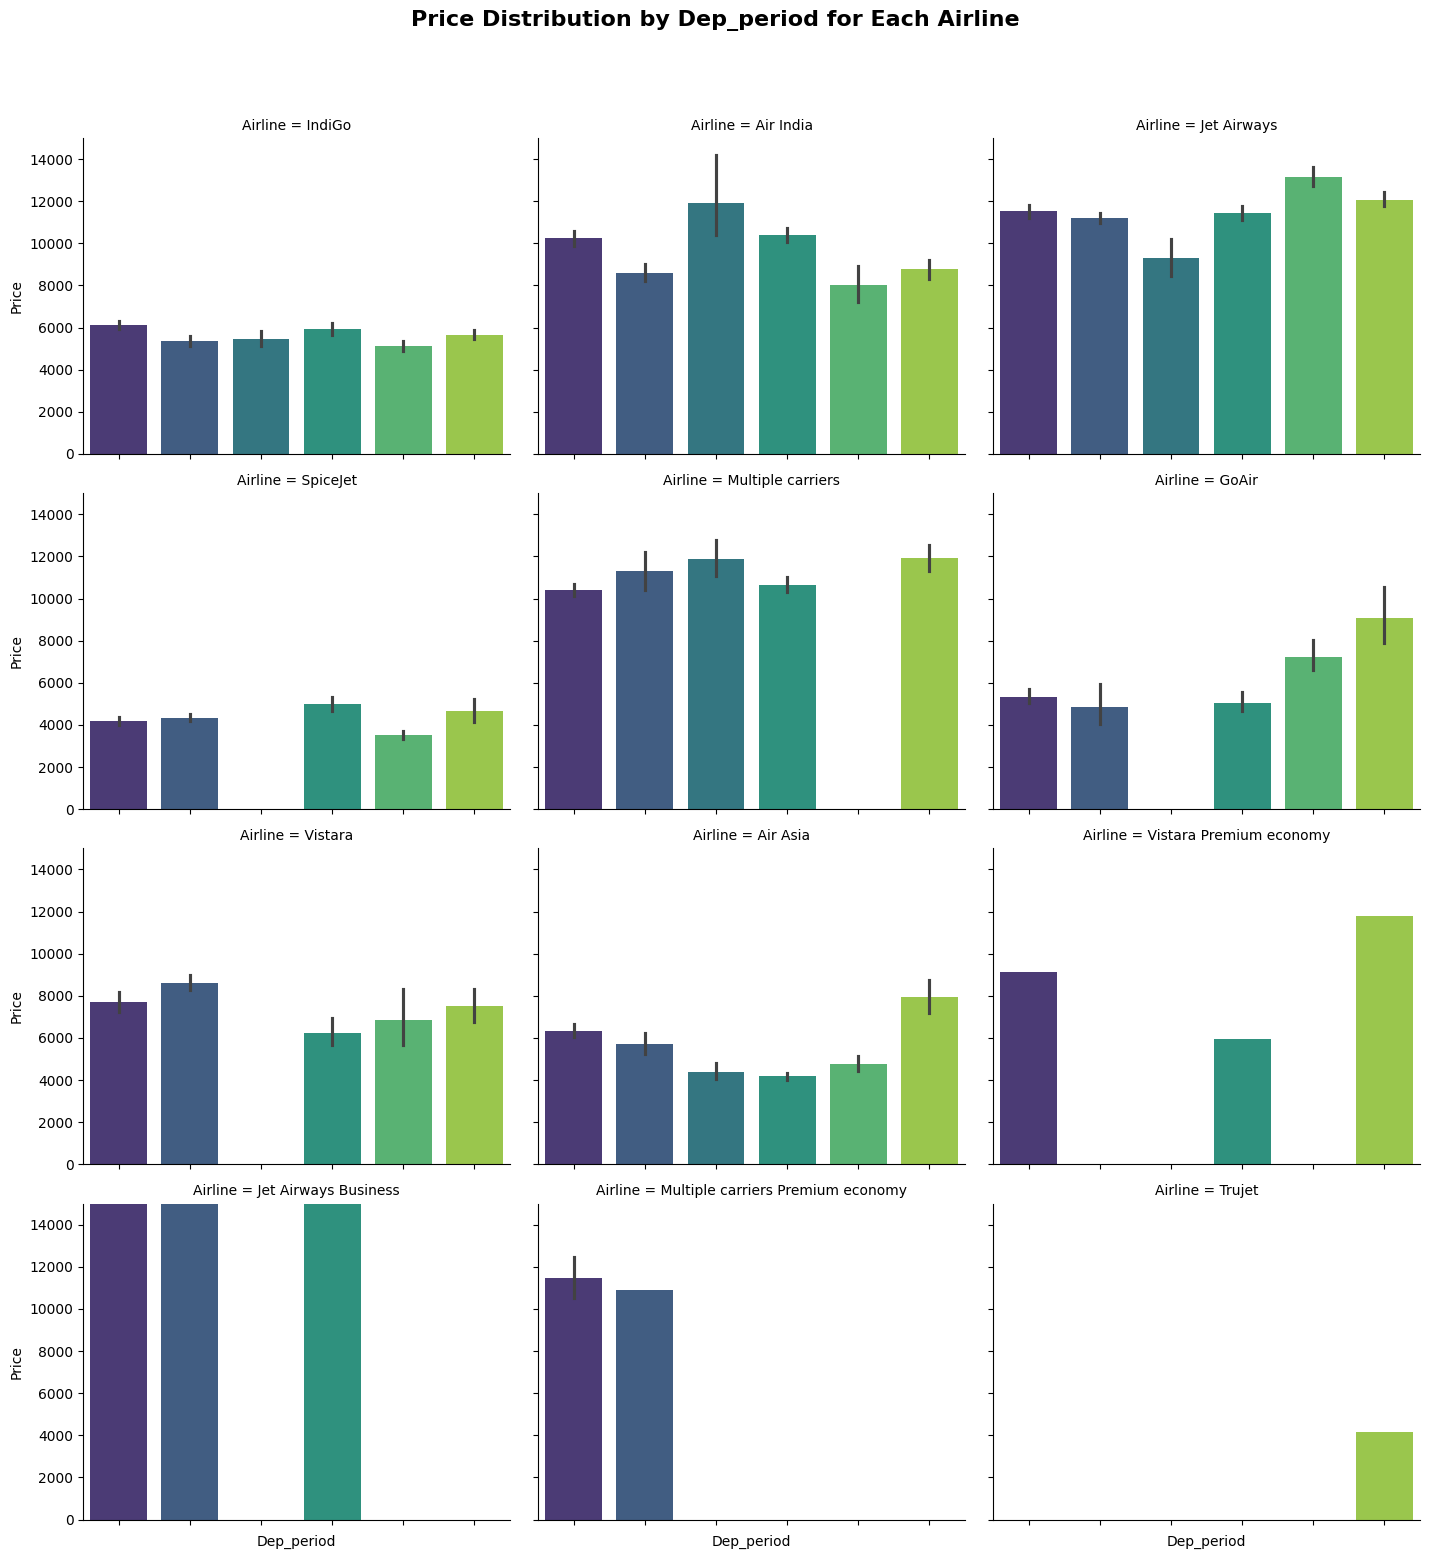

In [182]:
# Set up the FacetGrid to create subplots for each airline
g = sns.FacetGrid(data, col="Airline", col_wrap=3, height=4, aspect=1.2)

# Create a bar plot for 'Dep_period' and 'Price' within each airline
g.map(sns.barplot, "Dep_period", "Price", order=sorted(data['Dep_period'].unique()), palette="viridis")

# Customize the layout and titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price Distribution by Dep_period for Each Airline', fontsize=16, fontweight='bold')

# Add labels to x-axis and y-axis
g.set_axis_labels("Dep_period", "Price")

# Set the y-axis range and rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0, 15000)  
    ax.set_xlabel("Dep_period") 

plt.show()

### Observations and Insights:

#### Morning Flights (6 AM - 12 PM):
- **High Prices:** Premium airlines like Jet Airways and Vistara dominate.
- **Budget Options:** IndiGo and AirAsia offer lower ticket prices.
- **Demand:** Business travel drives higher fares.

#### Afternoon Flights (12 PM - 6 PM):
- **Moderate Prices:** SpiceJet and GoAir maintain average pricing.
- **Trends:** Budget airlines stay competitive, while premium airlines keep higher margins.

#### Evening Flights (6 PM - 12 AM):
- **Price Variance:** Wide range with premium carriers leading but overlaps with budget airlines.
- **Economical Options:** IndiGo and AirAsia remain affordable.

#### Late-Night/Early Morning Flights (12 AM - 6 AM):
- **Cheapest Tickets:** Low demand leads to lower fares.
- **Budget Leaders:** SpiceJet and GoAir dominate the economical segment.

### Key Insights:
- **Premium Airlines:** Jet Airways and Vistara maintain high prices across all periods.
- **Budget Airlines:** IndiGo and AirAsia provide consistently affordable fares.
- **Dep_period Effect:** Lower prices during late night/early morning; peak fares during mornings.
- **Economical Travel:** Best fares in late-night (12 AM - 6 AM) flights.
- **Business Hours:** Morning flights cater to business travelers, leading to higher fares.


# Arrival_period

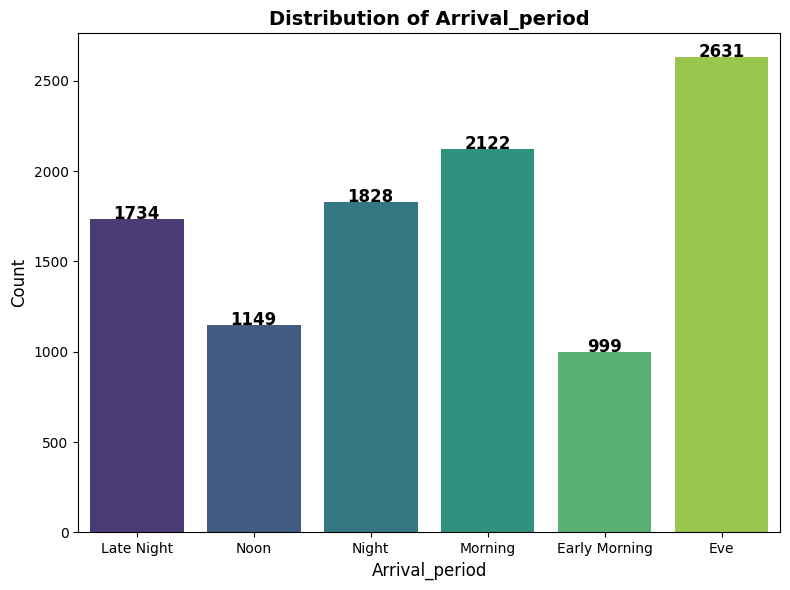

In [183]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the count plot for 'Arrival_period'
ax = sns.countplot(x='Arrival_period', data=data, palette='viridis')
# Annotate counts on the bars
for bar in ax.patches:
    count = int(bar.get_height())  
    x_pos = bar.get_x() + bar.get_width() / 2  
    y_pos = bar.get_height()  
    ax.text(x_pos, y_pos + 0.5, f'{count}', ha='center', fontsize=12, fontweight='bold')
# Customize the title and labels
plt.title('Distribution of Arrival_period', fontsize=14, fontweight='bold')
plt.xlabel('Arrival_period', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

### Observations and Insights: Arrival Period Distribution

#### Early Morning Arrivals (12 AM - 6 AM):
- **Low Frequency:** Few flights arrive during this time, reflecting low demand for late-night/early morning arrivals.
- **Target Audience:** Primarily caters to overnight travelers and red-eye flights.

#### Morning Arrivals (6 AM - 12 PM):
- **High Frequency:** This period shows the highest number of arrivals, indicating peak travel time.
- **Demand:** Aligns with business and workday schedules, attracting high passenger volumes.

#### Afternoon Arrivals (12 PM - 6 PM):
- **Moderate Frequency:** A balanced number of arrivals, with flights catering to leisure and mid-day travelers.
- **Connectivity:** Popular for connecting flights and mid-range travel plans.

#### Evening Arrivals (6 PM - 12 AM):
- **Moderate to High Frequency:** Significant flight arrivals, particularly for long-haul and return flights.
- **Demand Trend:** Reflects a mix of business and leisure travelers wrapping up their day.

### Key Insights:
- **Peak Period:** Morning (6 AM - 12 PM) is the busiest arrival period, likely driven by business and early travel plans.
- **Economical Travel:** Flights arriving in the early morning (12 AM - 6 AM) cater to budget-conscious travelers, given lower demand.
- **Evening Demand:** High arrivals during the evening (6 PM - 12 AM) indicate popularity among return and long-haul travelers.
- **Balanced Distribution:** Afternoon (12 PM - 6 PM) arrivals balance between leisure and connecting flights, showing consistent demand.


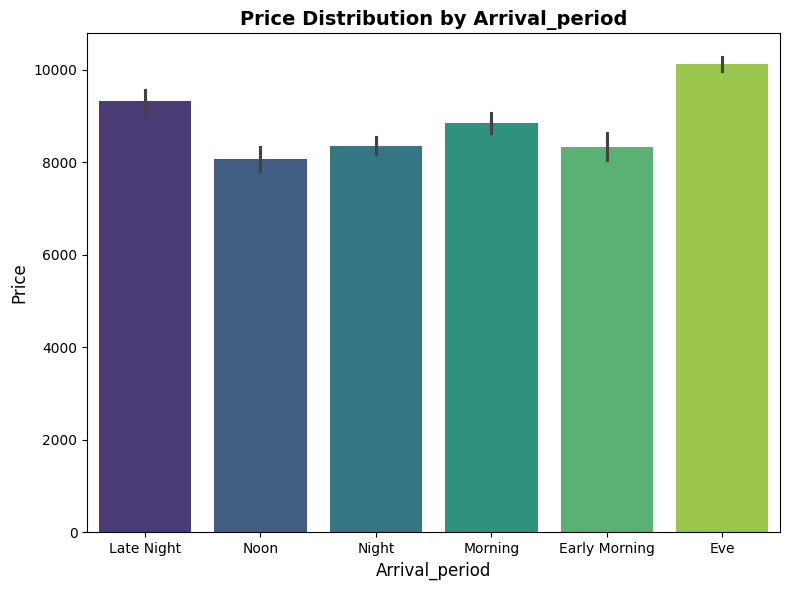

In [184]:
# Set the figure size for the countplot and boxplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Arrival_period', y='Price', data=data, palette='viridis')

# Customize the boxplot title and labels
plt.title('Price Distribution by Arrival_period', fontsize=14, fontweight='bold')
plt.xlabel('Arrival_period', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Observations and Insights: Price Distribution by Arrival Period

#### Early Morning Arrivals (12 AM - 6 AM):
- **Lowest Prices:** Flights arriving during this period tend to have the lowest average prices.
- **Demand Impact:** Lower demand for early morning arrivals results in more budget-friendly options.
- **Budget Airlines Dominate:** Airlines like IndiGo and SpiceJet are prominent in this period with consistently economical fares.

#### Morning Arrivals (6 AM - 12 PM):
- **High Price Range:** This period sees the highest average ticket prices across most airlines.
- **Business Travel Demand:** Premium pricing is driven by high demand from business travelers during peak hours.
- **Premium Airlines Lead:** Jet Airways and Vistara dominate this segment with their higher price margins.

#### Afternoon Arrivals (12 PM - 6 PM):
- **Moderate Price Distribution:** Ticket prices are relatively balanced, catering to a mix of business and leisure travelers.
- **Budget-Friendly Options:** Airlines like AirAsia and GoAir provide competitive fares, making them popular for mid-day travel.

#### Evening Arrivals (6 PM - 12 AM):
- **Wide Price Range:** Prices during this period show significant variance, with both premium and budget airlines in play.
- **Flexible Options:** Budget airlines like IndiGo and AirAsia offer economical options, while premium carriers maintain higher price levels.

### Key Insights:
- **Premium Period:** Morning arrivals (6 AM - 12 PM) reflect peak demand and higher ticket prices, suitable for business travelers.
- **Economical Period:** Early morning (12 AM - 6 AM) arrivals offer the most affordable fares, ideal for budget-conscious passengers.
- **Balanced Pricing:** Afternoon arrivals (12 PM - 6 PM) provide a mix of competitive pricing, making it suitable for leisure and connecting flights.
- **Evening Demand:** Evening arrivals (6 PM - 12 AM) cater to diverse traveler segments, with budget airlines providing affordable options despite the higher variance in prices.


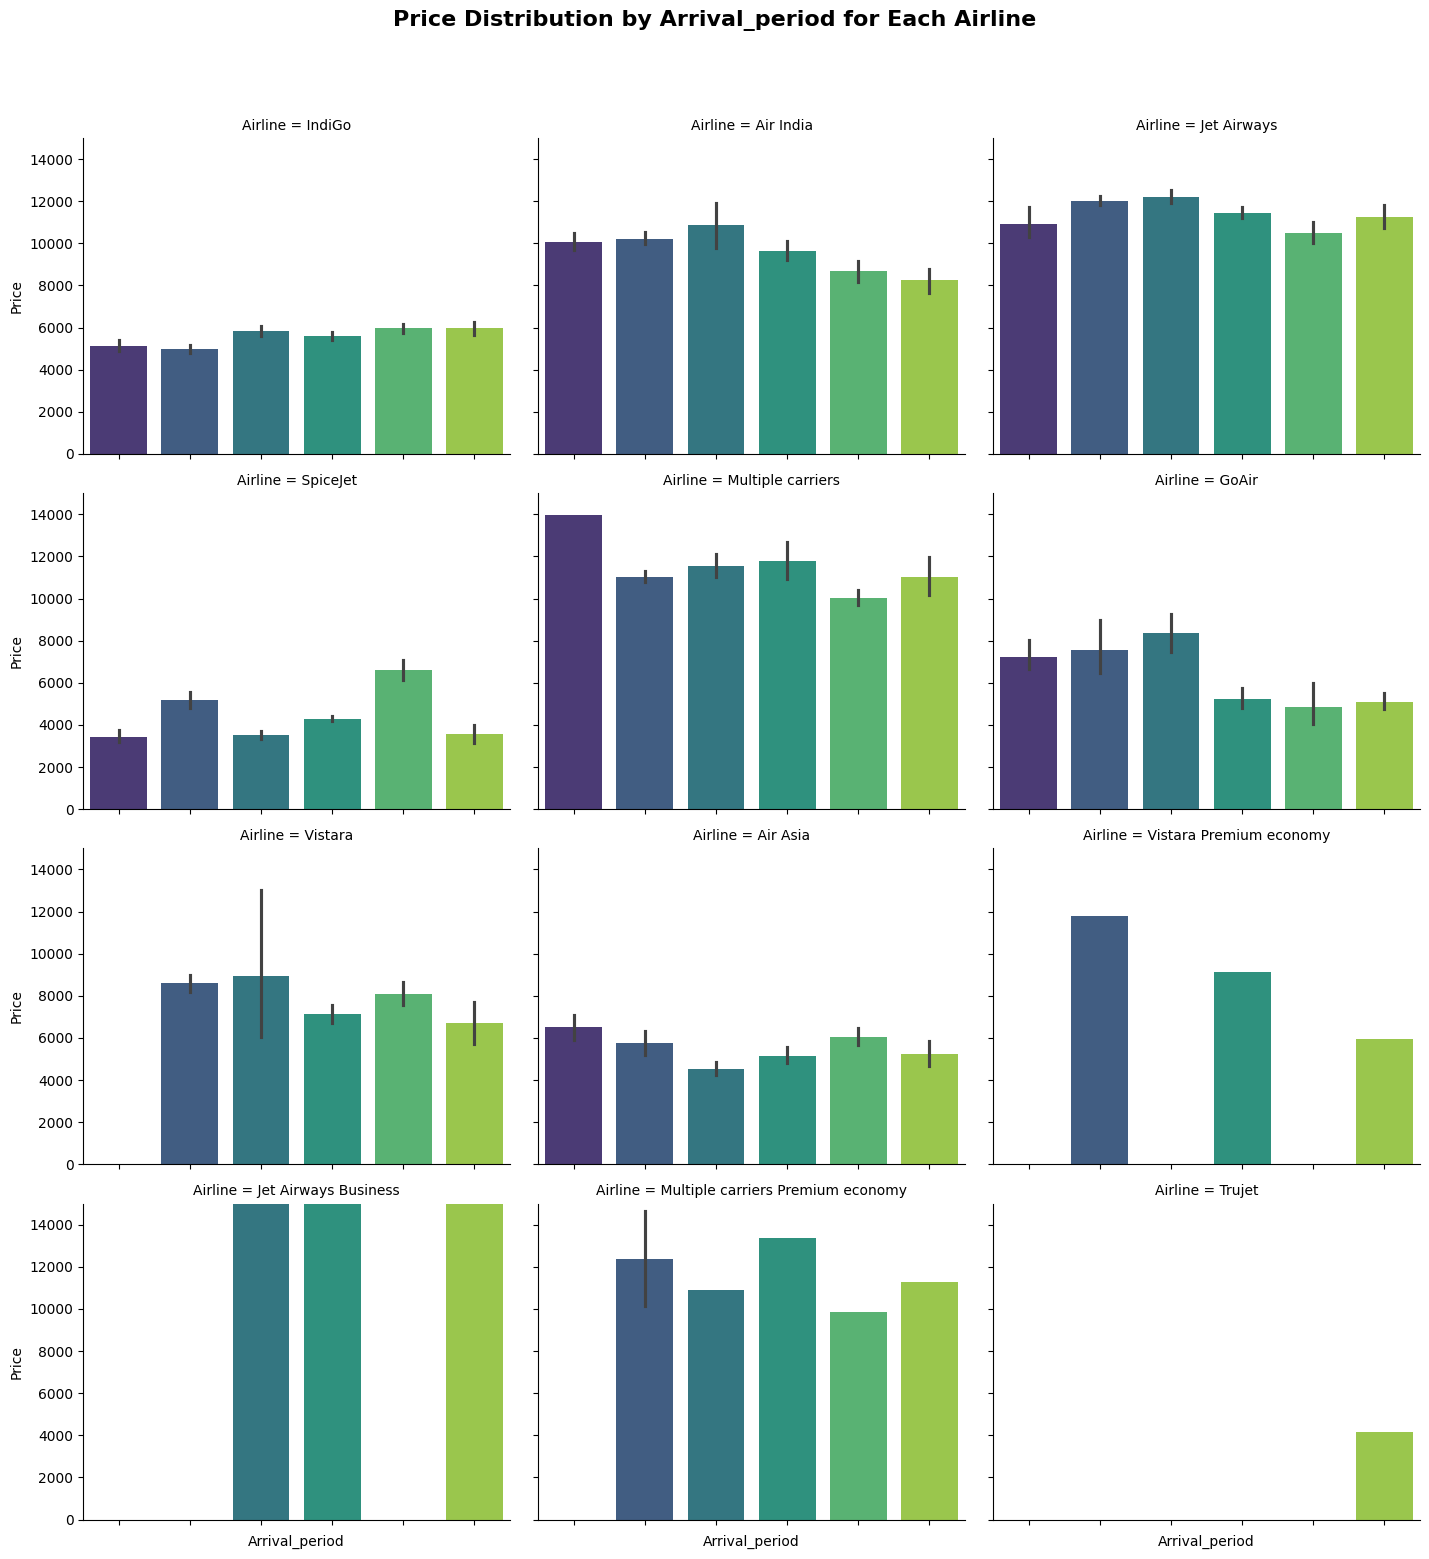

In [185]:
# Set up the FacetGrid to create subplots for each airline
g = sns.FacetGrid(data, col="Airline", col_wrap=3, height=4, aspect=1.2)

# Create a bar plot for 'Arrival_period' and 'Price' within each airline
g.map(sns.barplot, "Arrival_period", "Price", order=sorted(data['Arrival_period'].unique()), palette="viridis")

# Customize the layout and titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price Distribution by Arrival_period for Each Airline', fontsize=16, fontweight='bold')

# Add labels to x-axis and y-axis
g.set_axis_labels("Arrival_period", "Price")

# Set the y-axis range and rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0, 15000)  
    ax.set_xlabel("Arrival_period") 

plt.show()

### Observations and Insights: Price Distribution by Arrival Period for Each Airline

#### Jet Airways:
- **Higher Prices:** Jet Airways consistently has the highest ticket prices across all arrival periods.
- **Morning Arrivals (6 AM - 12 PM):** Significant price spikes are observed, aligning with business travel demand.
- **Stable Premium:** Prices remain high across other periods, maintaining its positioning as a premium airline.

#### Vistara:
- **Competitive Premium:** Similar to Jet Airways, Vistara shows higher ticket prices during all arrival periods.
- **Morning Dominance:** Morning arrivals (6 AM - 12 PM) reflect its focus on premium business travel.
- **Evening Arrivals (6 PM - 12 AM):** Prices show slightly more variance but remain on the higher side.

#### IndiGo:
- **Budget-Friendly:** IndiGo consistently offers lower prices across all arrival periods, appealing to cost-conscious travelers.
- **Early Morning (12 AM - 6 AM):** This period sees the most economical options for IndiGo flights.
- **Broad Consistency:** Minimal variance in ticket prices across all periods highlights its reliable pricing strategy.

#### SpiceJet:
- **Economical Options:** SpiceJet offers competitively low fares, particularly in the late-night (12 AM - 6 AM) and afternoon (12 PM - 6 PM) periods.
- **Morning Variance:** Prices increase slightly during morning arrivals, catering to higher demand.

#### AirAsia:
- **Lowest Price Range:** AirAsia consistently provides the most economical options across all arrival periods.
- **Demand Adaptability:** Maintains competitive pricing even during peak morning and evening periods.

#### GoAir:
- **Moderate Pricing:** GoAir remains in the mid-price range across all periods.
- **Late-Night Advantage:** Offers lower fares during late-night (12 AM - 6 AM) arrivals, competing with other budget airlines.

### Key Insights:
- **Premium Airlines:** Jet Airways and Vistara maintain their dominance in high-price segments, especially during morning and evening periods.
- **Budget Leaders:** AirAsia and IndiGo are the best choices for economical travel across all arrival periods.
- **Time-Based Pricing:** Early morning (12 AM - 6 AM) and late-night flights are the most affordable for all airlines, while morning arrivals (6 AM - 12 PM) are the most expensive due to peak demand.
- **Balanced Pricing:** Afternoon (12 PM - 6 PM) and evening (6 PM - 12 AM) arrivals offer a mix of budget and premium options.


# Source-Destination

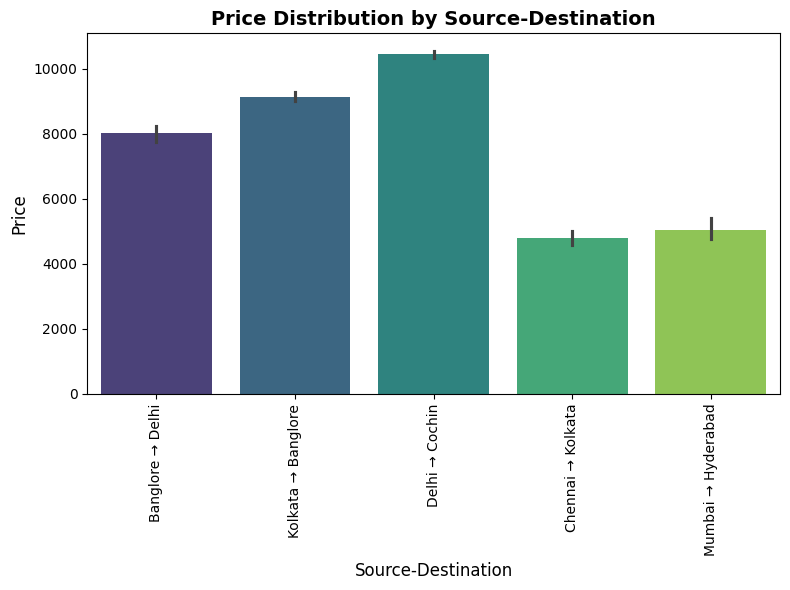

In [186]:
# Set the figure size for the bar plot
plt.figure(figsize=(8, 6))

# Create the bar plot for 'Source-Destination' and 'Price'
sns.barplot(x='Source-Destination', y='Price', data=data, palette='viridis')

# Customize the plot title and labels
plt.title('Price Distribution by Source-Destination', fontsize=14, fontweight='bold')
plt.xlabel('Source-Destination', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

### Observations and Insights: Price Distribution by Source-Destination

#### Source: Delhi
- **Delhi to Cochin:** Among the highest ticket prices, reflecting the distance and demand for this route.
- **Delhi to Bangalore:** Moderate to high price range, influenced by its status as a business and IT hub.
- **Delhi to Hyderabad:** Competitive pricing with moderate ticket prices, showcasing balanced demand.

#### Source: Mumbai
- **Mumbai to Cochin:** Shows high ticket prices, influenced by travel demand and fewer budget options.
- **Mumbai to Hyderabad:** A mix of budget and premium pricing, indicating varied traveler segments.

#### Source: Bangalore
- **Bangalore to Delhi:** Moderate to high pricing, driven by demand from business and leisure travelers.
- **Bangalore to Cochin:** Among the lower price ranges, likely due to shorter distances and frequent flights.

#### Source: Hyderabad
- **Hyderabad to Delhi:** Moderately priced, reflecting steady demand on this route.
- **Hyderabad to Bangalore:** Lower price range, attributed to the short distance and frequent connectivity.

#### Source: Cochin
- **Cochin to Delhi:** High price range due to long-distance travel and limited budget options.
- **Cochin to Bangalore:** Economical fares, reflecting shorter distances and frequent flights.

### Key Insights:
- **Long-Distance Routes:** Routes like Delhi to Cochin and Cochin to Delhi consistently have higher ticket prices due to distance and demand.
- **Short-Distance Routes:** Routes such as Bangalore to Cochin and Hyderabad to Bangalore are the most economical, reflecting short distances and competitive markets.
- **Business Hubs:** Cities like Delhi, Mumbai, and Bangalore exhibit moderate to high pricing across most routes, driven by business travel demand.


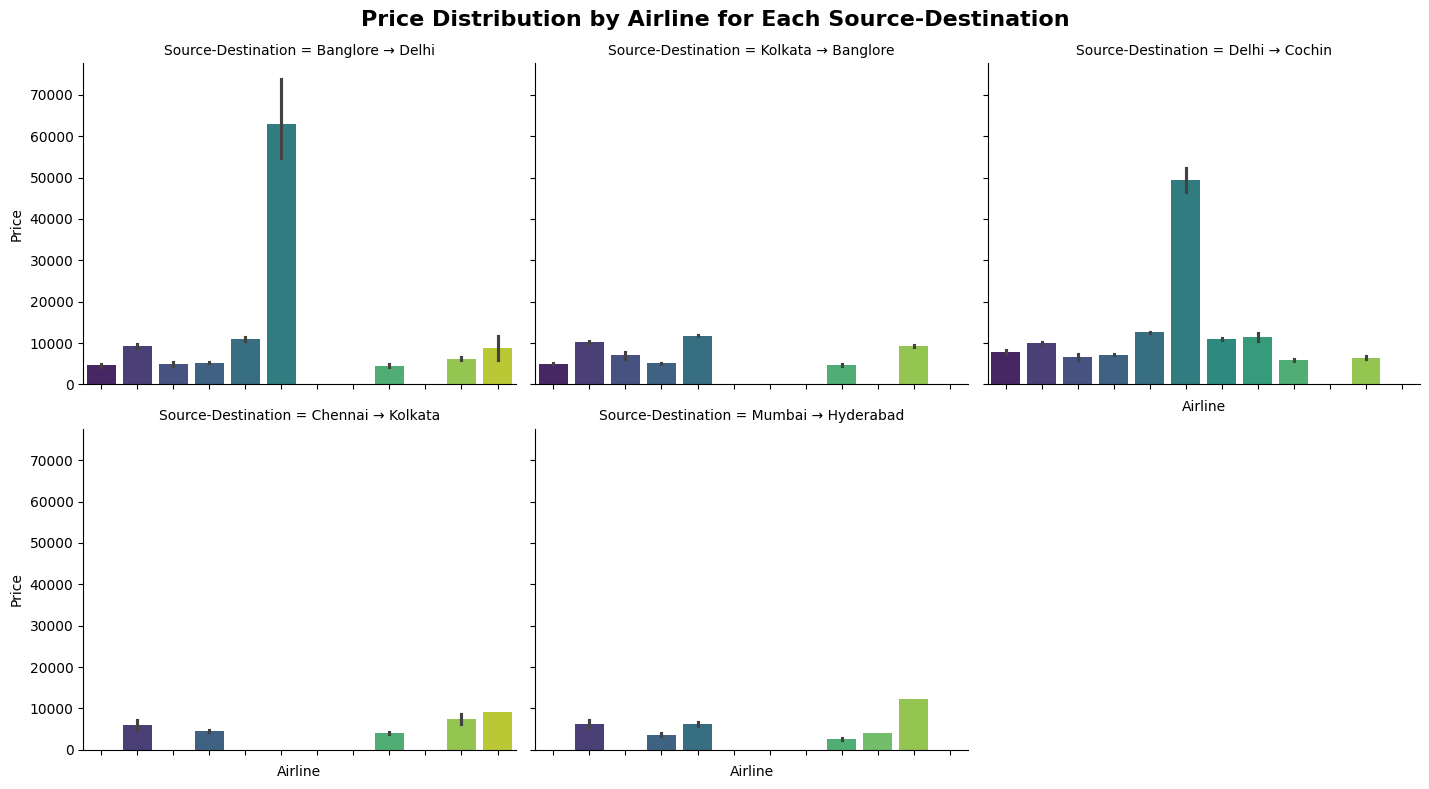

In [187]:
# Set up the FacetGrid to create subplots for each 'Source-Destination'
g = sns.FacetGrid(data, col="Source-Destination", col_wrap=3, height=4, aspect=1.2)

# Create a bar plot for 'Airline' and 'Price' within each 'Source-Destination'
g.map(
    sns.barplot,
    "Airline",
    "Price",
    order=sorted(data['Airline'].unique()),  # Ensures consistent ordering of airlines
    palette="viridis"
)

# Customize the layout and titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price Distribution by Airline for Each Source-Destination', fontsize=16, fontweight='bold')

# Add labels to x-axis and y-axis
g.set_axis_labels("Airline", "Price")

# Rotate x-axis labels for better readability and ensure airline names are visible
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)



# Adjust the layout to prevent overlap and ensure that the x-axis labels are visible
plt.tight_layout() 

plt.show()


### Observations and Insights: Price Distribution by Airline for Each Source-Destination

#### Source-Destination: Delhi to Cochin
- **Premium Airlines:** Jet Airways and Vistara dominate the higher price range, reflecting their premium services.
- **Budget Airlines:** IndiGo and AirAsia offer relatively lower fares, catering to cost-conscious travelers.

#### Source-Destination: Delhi to Bangalore
- **Wide Price Range:** Jet Airways shows the highest prices, while IndiGo and GoAir provide economical options.
- **Balanced Competition:** Airlines like SpiceJet and AirAsia maintain moderate fares, making them attractive for budget travelers.

#### Source-Destination: Mumbai to Cochin
- **Higher Prices:** Premium carriers like Jet Airways lead the price spectrum.
- **Economical Choices:** SpiceJet and IndiGo consistently offer lower fares, appealing to budget travelers.

#### Source-Destination: Hyderabad to Bangalore
- **Low Price Range:** Most airlines, including IndiGo and SpiceJet, show consistent and affordable pricing due to the short distance.
- **Minimal Variance:** The price distribution across airlines is narrow, indicating competitive pricing on this route.

#### Source-Destination: Bangalore to Cochin
- **Economical Fares:** IndiGo and AirAsia dominate the budget-friendly segment with consistently low prices.
- **Limited Premium Options:** Few airlines like Jet Airways operate in the higher price bracket, reflecting reduced premium demand for this route.

#### Source-Destination: Delhi to Hyderabad
- **Moderate Pricing:** Airlines such as GoAir and AirAsia offer competitive fares, while premium carriers like Jet Airways charge higher rates.

### Key Insights:
1. **Premium Airlines:** Jet Airways and Vistara consistently dominate the higher price ranges across most routes.
2. **Budget Airlines:** IndiGo and AirAsia maintain lower fares, making them ideal choices for economical travel.
3. **Short-Distance Routes:** Routes like Hyderabad to Bangalore and Bangalore to Cochin show minimal price variance, driven by shorter travel distances.
4. **High-Demand Routes:** Long-distance and high-demand routes, such as Delhi to Cochin and Mumbai to Cochin, exhibit a wider price range with notable premium options.


# Total_Duration_minutes

In [188]:
import plotly.express as px
import plotly.io as pio

# Assuming the data is in a DataFrame called 'data'
fig = px.box(data, x='Airline', y='Total_Duration_minutes', color='Airline', 
             title='Total Duration (Minutes) Ranges by Airline', 
             labels={'Total_Duration_minutes': 'Total Duration (Minutes)', 'Airline': 'Airline'})

# Show the plot with increased size
fig.update_layout(
    xaxis_title='Airline', 
    yaxis_title='Total Duration (Minutes)', 
    xaxis_tickangle=90,
    height=800, 
    width=1200   
)

# Set a renderer
pio.renderers.default = 'browser'  # Use browser renderer if not in Jupyter
fig.show()


### Inference: Total Duration (Minutes) Ranges by Airline

#### Observation:
- **IndiGo**:
  - Focuses on domestic and regional routes, offering shorter and more consistent flight durations.
  - Has the smallest range, indicating a specialization in short-haul flights.

- **Air India**:
  - Operates both domestic and international routes, resulting in a wide range of flight durations, with some exceeding 2000 minutes.
  - This variability reflects its long-haul and multi-stop flight offerings.

- **Jet Airways**:
  - Offers a broad range of flight durations, with a higher median compared to low-cost carriers.
  - Likely serves both long-haul and multi-stop routes.

- **SpiceJet**:
  - Similar to IndiGo, it focuses on regional or domestic travel, providing shorter and consistent durations.

- **Multiple Carriers**:
  - Demonstrates a wide range of durations, reflecting a mix of short-haul and long-haul operations.

- **Vistara**:
  - Features longer durations with a wide range, likely due to its international and premium service routes.

- **Air Asia**:
  - Offers moderate durations, suggesting a mix of short and medium-haul flights.

- **TruJet**:
  - Specializes in short-haul domestic flights, with the shortest and most consistent durations.

#### Insight:
- Airlines such as **IndiGo**, **SpiceJet**, and **TruJet** prioritize time-sensitive travelers by focusing on efficient short-haul services.
- Carriers like **Air India**, **Jet Airways**, and **Vistara** cater to a diverse customer base with both long-haul and premium flight options, leading to greater variability in durations.
- The wide duration ranges observed in **Multiple Carriers** reflect their flexibility in offering both short and long-haul routes to meet varying customer needs.
- Outliers in duration for airlines like **Air India** and **Jet Airways** highlight occasional extended layovers or long-haul operations.


In [189]:
fig = px.box(data, x='Total_Stops', y='Total_Duration_minutes', color='Total_Stops', 
             title='Total Duration (Minutes) Ranges by Total Stops', 
             labels={'Total_Duration_minutes': 'Total Duration (Minutes)', 'Total_Stops': 'Total Stops'})

# Update layout to make the plot bigger
fig.update_layout(
    xaxis_title='Total Stops', 
    yaxis_title='Total Duration (Minutes)', 
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    height=600,  # Increase height
    width=800,  # Increase width
    title="Total Duration Ranges by Total Stops"
)

fig.show()

### Observations:
#### Non-Stop Flights:
- Have the shortest durations, tightly clustered with minimal variability.
- These flights are more time-efficient due to no layovers.

#### 1 Stop Flights:
- Show moderate duration with some variability.
- Longer than non-stop flights but shorter than flights with multiple stops.

#### 2 Stops Flights:
- Have a wide range of durations, indicating significant variability due to layover times.
- Includes outliers with extremely long durations.

#### 3 Stops Flights:
- Show the highest average duration and variability.
- Likely used for long-haul routes with multiple connections.

#### 4 Stops Flights:
- Have limited representation but show durations comparable to 3-stop flights.

### Insights:
- Non-stop flights are ideal for passengers prioritizing time efficiency.
- Flights with more stops are associated with increased travel time and variability, often used for long-haul or less frequent routes.
- Outliers in 2-stop flights suggest that some connections may lead to extended travel times, which can be optimized.
- For better customer satisfaction, airlines should focus on minimizing layover durations, especially for 2 and 3-stop flights.


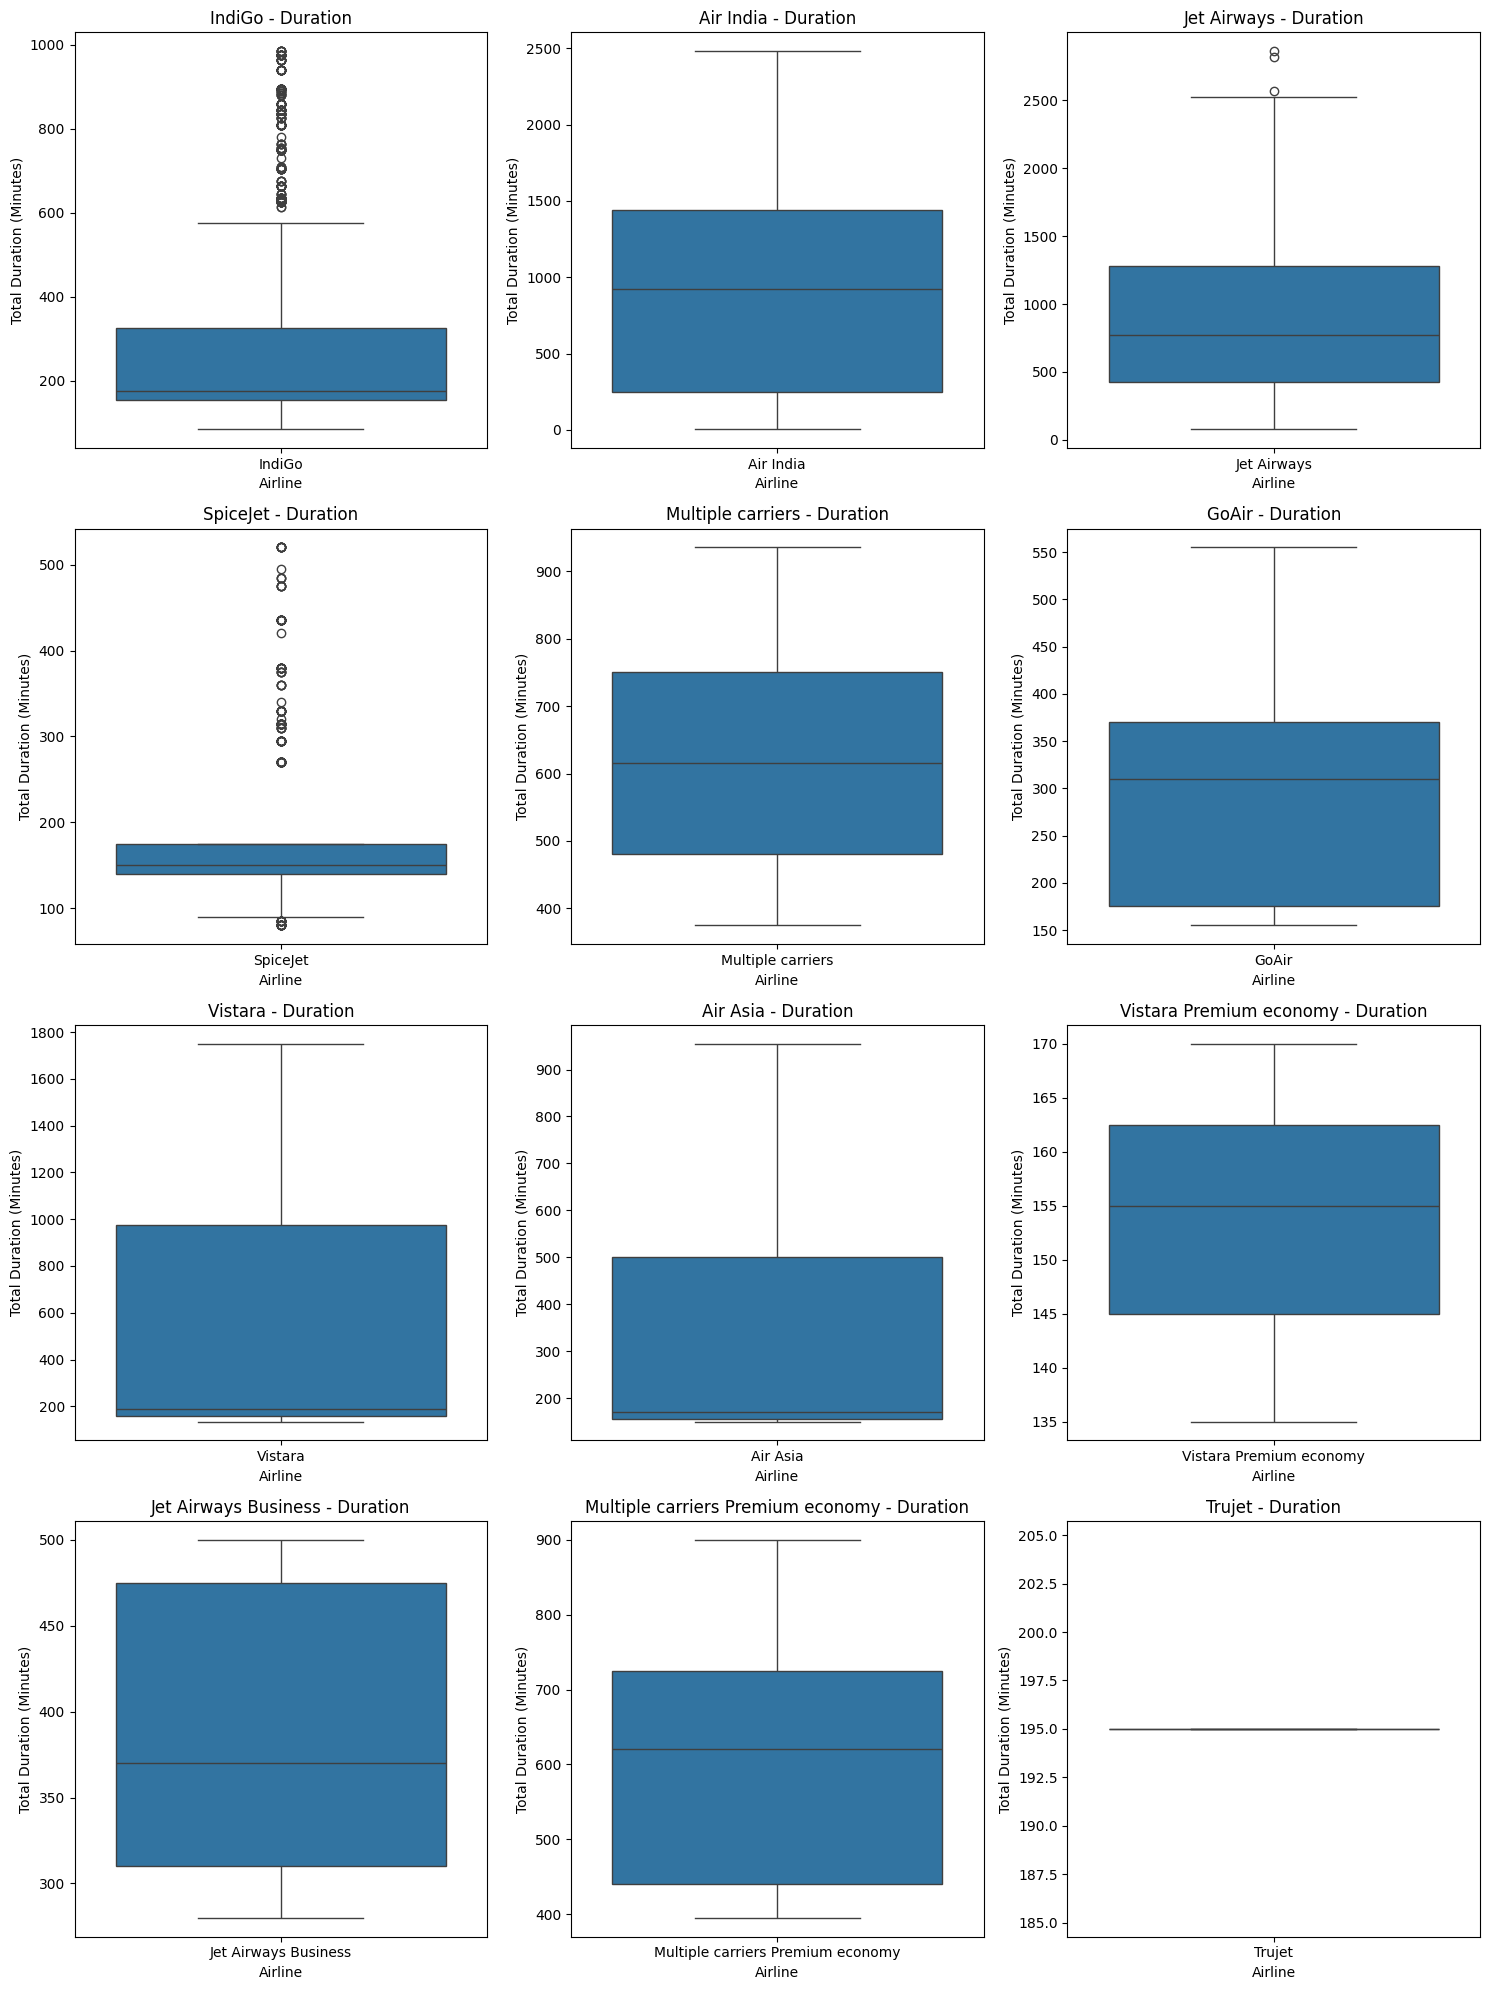

In [190]:
# Get unique airlines for subplots
airlines = data['Airline'].unique()

# Calculate the number of rows and columns needed for the subplots
n_airlines = len(airlines)
n_cols = 3  # You can adjust this to change the number of columns
n_rows = int(np.ceil(n_airlines / n_cols))  # Dynamically calculate rows based on the number of airlines

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust height based on number of rows
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each airline and create a boxplot
for i, airline in enumerate(airlines):
    ax = axes[i]  # Get the corresponding axis for the subplot
    
    # Filter data for the current airline
    airline_data = data[data['Airline'] == airline]
    
    # Create a boxplot for Total_Duration_minutes for the current airline
    sns.boxplot(x='Airline', y='Total_Duration_minutes', data=airline_data, ax=ax)
    
    # Set title for each subplot
    ax.set_title(f'{airline} - Duration')
    ax.set_xlabel('Airline')
    ax.set_ylabel('Total Duration (Minutes)')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### **Key Insights**

1. **Price Distribution**:
   - The flight prices range from a minimum of ₹1,759 to a maximum of ₹79,512.
   - Most flight prices fall between ₹5,224 and ₹12,343, forming the primary price bracket.
   - Outliers at the higher end represent premium or long-haul flights.

2. **Airline vs Price**:
   - **Jet Airways** has the highest average prices, likely due to its premium services and international routes.
   - Budget airlines like **IndiGo**, **SpiceJet**, and **GoAir** offer lower average prices, targeting cost-conscious travelers.
   - Premium airlines show higher price variability, reflecting diverse service offerings like business class.

3. **Total Stops vs Duration**:
   - Non-stop flights are the shortest in duration and most time-efficient.
   - Flights with more stops (2 or 3) show increasing durations and variability, primarily due to layovers.
   - Outliers in 2-stop flights indicate extended layovers, which can be optimized.

4. **Duration by Airline**:
   - Budget airlines tend to have shorter durations for domestic routes.
   - Premium airlines like **Jet Airways** and **Air India** cater to longer international routes, increasing duration variability.

5. **Departure and Arrival Times**:
   - Peak departure times occur in the early morning and evening, aligning with passenger preferences.
   - Late-night departures are less common, likely targeting specific routes or preferences.


#### Final Recommendations

- **For Passengers**:
  - Choose non-stop flights for time efficiency, especially for short-haul travel.
  - Budget-conscious travelers should prefer airlines like **IndiGo** and **SpiceJet**.
  - For premium experiences, consider **Jet Airways** or **Air India**.

- **For Airlines**:
  - Optimize layover durations for multi-stop flights to reduce variability.
  - Enhance service differentiation for premium flights to justify higher prices.
  - Target peak departure and arrival times to maximize passenger convenience

# Data Cleaning

In [191]:
# Mapping of stops to numeric values
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4  # Adjust as needed based on your data
}

# Apply the mapping to the 'Total_Stops' column
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping)


In [192]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10463, dtype: int64

In [193]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation with 'Price'
price_correlation = numeric_data.corr()["Price"]
print(price_correlation)

Total_Stops               0.601997
Price                     1.000000
Journey_day              -0.159009
Journey_month            -0.113403
Dep_hour                  0.005174
Dep_min                  -0.024189
Arrival_hour              0.031043
Arrival_min              -0.086164
Duration_hours            0.504090
Duration_mins            -0.131683
Total_Duration_minutes    0.501645
Name: Price, dtype: float64


In [194]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Season,Dep_hour,Dep_min,Dep_period,Arrival_hour,Arrival_min,Arrival_period,Duration_hours,Duration_mins,Source-Destination,Total_Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,0,No info,3897,24,3,spring,22,20,Night,1,10,Late Night,2,50,Banglore → Delhi,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2,No info,7662,1,5,spring,5,50,Early Morning,13,15,Noon,7,25,Kolkata → Banglore,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2,No info,13882,9,6,summer,9,25,Morning,4,25,Late Night,19,0,Delhi → Cochin,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1,No info,6218,12,5,spring,18,5,Eve,23,30,Night,5,25,Kolkata → Banglore,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,1,No info,13302,1,3,spring,16,50,Noon,21,35,Night,4,45,Banglore → Delhi,285


In [195]:
# Drop unnecessary columns
columns_to_drop = ['Route', 'Additional_Info', 'Source-Destination','Dep_Time','Journey_Season','Dep_period','Arrival_period','Source-Destination',
                  'Duration_hours','Duration_mins']  
data = data.drop(columns=columns_to_drop)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Total_Duration_minutes
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,285


In [196]:
import pickle
pickle.dump(data,open("data.pkl" ,"wb") )

In [197]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
data_encoded = data.copy()
for column in data.select_dtypes(include=['object']).columns:
    data_encoded[column] = LabelEncoder().fit_transform(data[column])

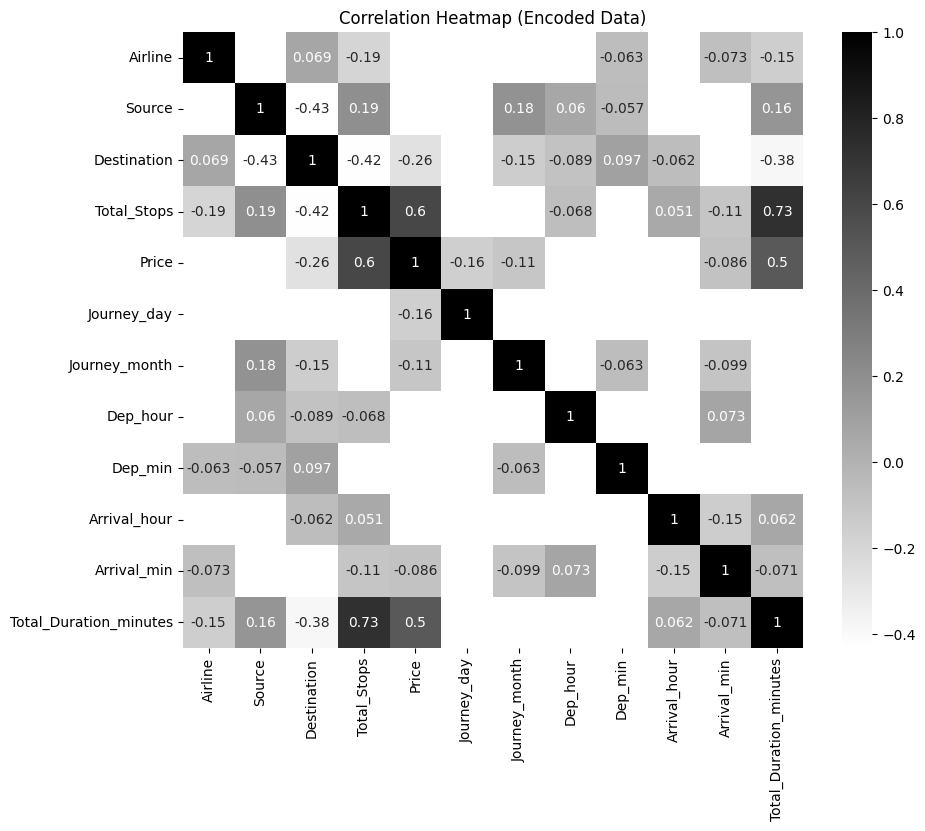

In [198]:


# Compute correlation matrix
correlation_matrix = data_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='gist_gray_r', mask=abs(correlation_matrix) < 0.05, annot=True)
plt.title('Correlation Heatmap (Encoded Data)')
plt.show()

# Apply Label encoding and Get dummies for categorical variables

In [199]:
# Apply One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination'])

# Check the encoded data
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Total_Duration_minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,170,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,2,7662,1,5,5,50,13,15,445,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,2,13882,9,6,9,25,4,25,1140,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
3,1,6218,12,5,18,5,23,30,325,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
4,1,13302,1,3,16,50,21,35,285,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [200]:
# Save the DataFrame to a CSV file
data.to_csv('final_data.csv', index=False)